# Dataset Handling

#### Importing Libraries

In [723]:
import pandas as pd
import numpy as np

#### Import Datasets

In [724]:
claims_df = pd.read_csv("Claims Data.csv") # Claims Data
product_code = pd.read_csv("Product Mapping.csv") # Product Mapping Code
procedure_code = pd.read_csv("Procedure Mapping.csv",dtype='object') # Procedure Mapping Code
product_category =  pd.read_csv("Product Category.csv") # Product Category
product_abbreviation =  pd.read_csv("Product Abbreviation.csv") # Product Abbreviation
prescription_data = pd.read_csv('Prescription Data.csv') # Prescription Data
claims_df['Transaction date'] = pd.to_datetime(claims_df['Transaction date'], format='%Y-%m-%d') # Converting date into datetime format

#### Visualize the Data

In [725]:
claims_df.head()

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4
0,PATIENT_001,HCP_17,878,J1004,2022-09-01,C34.11,C78,M6614,NaN
1,PATIENT_001,HCP_17,1279,J1001,2022-11-08,C34.11,C78,S55091A,NaN
2,PATIENT_001,HCP_17,2803,J1004,2022-01-12,C34.11,C78,S45901S,NaN
3,PATIENT_001,HCP_17,3876,J1004,2022-05-11,C34.11,C78,N981,NaN
4,PATIENT_001,HCP_17,5629,J1001,2022-03-08,C34.11,C78,S55091A,NaN


In [726]:
product_code.head()

,HCPCS_ code,Product Name
0,J1001,Ticaprant
1,J1002,NOVmatinib
2,J1003,AZNertrib
3,J1004,BMSRizi
4,J2001,Pemetrexed


In [727]:
procedure_code.head()

,HCPCS_ code,Procedure Name
0,81235,EGFR test
1,78815,PET scan
2,70450,Brain MRI
3,70460,Brain MRI
4,70470,Brain MRI


In [728]:
product_category.head()

,Product Name,Product Category
0,Ticaprant,Market Basket
1,NOVmatinib,Market Basket
2,AZNertrib,Market Basket
3,BMSRizi,Market Basket
4,Pemetrexed,Chemotherapy


In [729]:
prescription_data.head()

,Unnamed: 0,HCP_ID,yearmonth,HCPCS_ code,TRx
0,0,HCP_01,202201,J1002,20
1,1,HCP_01,202202,J1003,10
2,2,HCP_01,202203,J1002,20
3,3,HCP_01,202203,J1003,10
4,4,HCP_01,202204,J1002,10


#### Map the Data (Product code, Procudere Codes and Product Category to Claims Data)

In [730]:
mapped_df = pd.merge(pd.merge(pd.merge(claims_df,product_code, how = 'left', on = 'HCPCS_ code'),procedure_code, how = 'left', on = 'HCPCS_ code'),product_category, how = 'left', on = 'Product Name')
mapped_df.head()

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,Procedure Name,Product Category
0,PATIENT_001,HCP_17,878,J1004,2022-09-01,C34.11,C78,M6614,NaN,BMSRizi,NaN,Market Basket
1,PATIENT_001,HCP_17,1279,J1001,2022-11-08,C34.11,C78,S55091A,NaN,Ticaprant,NaN,Market Basket
2,PATIENT_001,HCP_17,2803,J1004,2022-01-12,C34.11,C78,S45901S,NaN,BMSRizi,NaN,Market Basket
3,PATIENT_001,HCP_17,3876,J1004,2022-05-11,C34.11,C78,N981,NaN,BMSRizi,NaN,Market Basket
4,PATIENT_001,HCP_17,5629,J1001,2022-03-08,C34.11,C78,S55091A,NaN,Ticaprant,NaN,Market Basket


# Patient Cohort Analysis

#### Full Claims Data (Assuming Cohort 1)

In [731]:
# Cohort 1: Full Claims Data
patient_cohort1_data = mapped_df
patient_cohort1_list = mapped_df['Pat_ID'].unique()
patient_cohort1_count = mapped_df['Pat_ID'].nunique()
print(patient_cohort1_list)
print(patient_cohort1_count)

['PATIENT_001' 'PATIENT_002' 'PATIENT_003' 'PATIENT_004' 'PATIENT_005'
 'PATIENT_006' 'PATIENT_007' 'PATIENT_008' 'PATIENT_009' 'PATIENT_010'
 'PATIENT_011' 'PATIENT_012' 'PATIENT_013' 'PATIENT_014' 'PATIENT_015'
 'PATIENT_016' 'PATIENT_017' 'PATIENT_018' 'PATIENT_019' 'PATIENT_020'
 'PATIENT_021' 'PATIENT_022' 'PATIENT_023' 'PATIENT_024' 'PATIENT_025'
 'PATIENT_026' 'PATIENT_027' 'PATIENT_028' 'PATIENT_029' 'PATIENT_030'
 'PATIENT_031' 'PATIENT_032' 'PATIENT_033' 'PATIENT_034' 'PATIENT_035'
 'PATIENT_036' 'PATIENT_037' 'PATIENT_038' 'PATIENT_039' 'PATIENT_040'
 'PATIENT_041' 'PATIENT_042' 'PATIENT_043' 'PATIENT_044' 'PATIENT_045'
 'PATIENT_046' 'PATIENT_047' 'PATIENT_048' 'PATIENT_049' 'PATIENT_050'
 'PATIENT_051' 'PATIENT_052' 'PATIENT_053' 'PATIENT_054' 'PATIENT_055'
 'PATIENT_056' 'PATIENT_057' 'PATIENT_058' 'PATIENT_059' 'PATIENT_060'
 'PATIENT_061' 'PATIENT_062' 'PATIENT_063' 'PATIENT_064' 'PATIENT_065'
 'PATIENT_066' 'PATIENT_067' 'PATIENT_068' 'PATIENT_069' 'PATIENT_070'
 'PATI

#### NSCLC diagnosed Patients(Cohort 2)
- Diagnosis Code Starts with 'C34'
- Number of claim count must be greater than 2

In [732]:
# Ensure all Diagnosis columns are of string type
diagnosis_cols = ['Diagnosis 1', 'Diagnosis 2', 'Diagnosis 3', 'Diagnosis 4']
for col in diagnosis_cols:
    patient_cohort1_data[col] = patient_cohort1_data[col].astype(str)

# Cohort 2: NSCLC Patients
patient_cohort2_temp = patient_cohort1_data[
    (patient_cohort1_data['Diagnosis 1'].str.startswith('C34')) |
    (patient_cohort1_data['Diagnosis 2'].str.startswith('C34')) |
    (patient_cohort1_data['Diagnosis 3'].str.startswith('C34')) |
    (patient_cohort1_data['Diagnosis 4'].str.startswith('C34'))
].reset_index()

# NSCLC_diagnosis_claim_count
NSCLC_diagnosis_count = patient_cohort2_temp.groupby('Pat_ID').agg(
    NSCLC_claim_count=('Claim ID', 'count')
)
NSCLC_diagnosis_count.reset_index(inplace=True)

NSCLC_patient_list_two_claims = NSCLC_diagnosis_count[NSCLC_diagnosis_count['NSCLC_claim_count'] >= 2]['Pat_ID'].tolist()
patient_cohort2_data = patient_cohort1_data[patient_cohort1_data['Pat_ID'].isin(NSCLC_patient_list_two_claims)]
patient_cohort2_list = patient_cohort2_data['Pat_ID'].unique()
patient_cohort2_count = patient_cohort2_data['Pat_ID'].nunique()

print(patient_cohort2_list)
print(patient_cohort2_count)


['PATIENT_001' 'PATIENT_002' 'PATIENT_003' 'PATIENT_004' 'PATIENT_005'
 'PATIENT_006' 'PATIENT_007' 'PATIENT_008' 'PATIENT_009' 'PATIENT_010'
 'PATIENT_011' 'PATIENT_012' 'PATIENT_013' 'PATIENT_014' 'PATIENT_015'
 'PATIENT_016' 'PATIENT_017' 'PATIENT_018' 'PATIENT_019' 'PATIENT_020'
 'PATIENT_021' 'PATIENT_022' 'PATIENT_023' 'PATIENT_024' 'PATIENT_025'
 'PATIENT_026' 'PATIENT_027' 'PATIENT_028' 'PATIENT_029' 'PATIENT_030'
 'PATIENT_031' 'PATIENT_032' 'PATIENT_033' 'PATIENT_034' 'PATIENT_035'
 'PATIENT_036' 'PATIENT_037' 'PATIENT_038' 'PATIENT_039' 'PATIENT_040'
 'PATIENT_041' 'PATIENT_042' 'PATIENT_043' 'PATIENT_044' 'PATIENT_045'
 'PATIENT_046' 'PATIENT_047' 'PATIENT_048' 'PATIENT_049' 'PATIENT_050'
 'PATIENT_051' 'PATIENT_052' 'PATIENT_053' 'PATIENT_054' 'PATIENT_055'
 'PATIENT_056' 'PATIENT_057' 'PATIENT_058' 'PATIENT_059' 'PATIENT_060'
 'PATIENT_061' 'PATIENT_062' 'PATIENT_063' 'PATIENT_064' 'PATIENT_065'
 'PATIENT_066' 'PATIENT_067' 'PATIENT_068' 'PATIENT_069' 'PATIENT_070'
 'PATI

In [733]:
'''# Cohort 2: NSCLC Patients
patient_cohort2_temp = patient_cohort1_data[(patient_cohort1_data['Diagnosis 1'].str.startswith('C34')) | (patient_cohort1_data['Diagnosis 2'].str.startswith('C34')) |
                                             (patient_cohort1_data['Diagnosis 3'].str.startswith('C34')) | (patient_cohort1_data['Diagnosis 4'].str.startswith('C34'))].reset_index()

# NSCLC_diagnosis_claim_count
NSCLC_diagnosis_count = patient_cohort2_temp.groupby('Pat_ID').agg(
    NSCLC_claim_count = ('Claim ID','count')
)
NSCLC_diagnosis_count.reset_index(inplace = True)

NSCLC_patient_list_two_claims = (NSCLC_diagnosis_count[NSCLC_diagnosis_count['NSCLC_claim_count'] >= 2]['Pat_ID']).tolist()
patient_cohort2_data = patient_cohort1_data[patient_cohort1_data['Pat_ID'].isin(NSCLC_patient_list_two_claims)]
patient_cohort2_list = patient_cohort2_data['Pat_ID'].unique()
patient_cohort2_count = patient_cohort2_data['Pat_ID'].nunique()
print(patient_cohort2_list)
print(patient_cohort2_count)'''

"# Cohort 2: NSCLC Patients\npatient_cohort2_temp = patient_cohort1_data[(patient_cohort1_data['Diagnosis 1'].str.startswith('C34')) | (patient_cohort1_data['Diagnosis 2'].str.startswith('C34')) |\n                                             (patient_cohort1_data['Diagnosis 3'].str.startswith('C34')) | (patient_cohort1_data['Diagnosis 4'].str.startswith('C34'))].reset_index()\n\n# NSCLC_diagnosis_claim_count\nNSCLC_diagnosis_count = patient_cohort2_temp.groupby('Pat_ID').agg(\n    NSCLC_claim_count = ('Claim ID','count')\n)\nNSCLC_diagnosis_count.reset_index(inplace = True)\n\nNSCLC_patient_list_two_claims = (NSCLC_diagnosis_count[NSCLC_diagnosis_count['NSCLC_claim_count'] >= 2]['Pat_ID']).tolist()\npatient_cohort2_data = patient_cohort1_data[patient_cohort1_data['Pat_ID'].isin(NSCLC_patient_list_two_claims)]\npatient_cohort2_list = patient_cohort2_data['Pat_ID'].unique()\npatient_cohort2_count = patient_cohort2_data['Pat_ID'].nunique()\nprint(patient_cohort2_list)\nprint(patient_coho

#### mNSCLC diagonosed Patients(Cohort 3)
- Diagnosis Code Starts with 'C78'
- Number of claim count must be greater than 2

In [734]:
# Cohort 3: mNSCLC Patients
patient_cohort3_temp = patient_cohort2_data[(patient_cohort2_data['Diagnosis 1'].str.startswith('C78')) | (patient_cohort2_data['Diagnosis 2'].str.startswith('C78')) |
                                             (patient_cohort2_data['Diagnosis 3'].str.startswith('C78')) | (patient_cohort2_data['Diagnosis 4'].str.startswith('C78'))].reset_index()


# mNSCLC_diagnosis_claim_count
mNSCLC_diagnosis_count = patient_cohort3_temp.groupby('Pat_ID').agg(
    mNSCLC_claim_count = ('Claim ID','count')
)
mNSCLC_diagnosis_count.reset_index(inplace = True)
mNSCLC_patient_list_two_claims = (mNSCLC_diagnosis_count[mNSCLC_diagnosis_count['mNSCLC_claim_count'] >= 2]['Pat_ID']).tolist()

patient_cohort3_data = patient_cohort2_data[patient_cohort2_data['Pat_ID'].isin(mNSCLC_patient_list_two_claims)]
patient_cohort3_list = patient_cohort3_data['Pat_ID'].unique()
patient_cohort3_count = patient_cohort3_data['Pat_ID'].nunique()
print(patient_cohort3_list)
print(patient_cohort3_count)

['PATIENT_001' 'PATIENT_002' 'PATIENT_003' 'PATIENT_004' 'PATIENT_005'
 'PATIENT_006' 'PATIENT_007' 'PATIENT_008' 'PATIENT_009' 'PATIENT_010'
 'PATIENT_011' 'PATIENT_012' 'PATIENT_013' 'PATIENT_014' 'PATIENT_015'
 'PATIENT_016' 'PATIENT_017' 'PATIENT_018' 'PATIENT_019' 'PATIENT_020'
 'PATIENT_021' 'PATIENT_022' 'PATIENT_023' 'PATIENT_024' 'PATIENT_025'
 'PATIENT_026' 'PATIENT_027' 'PATIENT_028' 'PATIENT_029' 'PATIENT_030'
 'PATIENT_031' 'PATIENT_032' 'PATIENT_033' 'PATIENT_034' 'PATIENT_035'
 'PATIENT_036' 'PATIENT_037' 'PATIENT_038' 'PATIENT_039' 'PATIENT_040'
 'PATIENT_041' 'PATIENT_042' 'PATIENT_043' 'PATIENT_044' 'PATIENT_045'
 'PATIENT_046' 'PATIENT_047' 'PATIENT_048' 'PATIENT_049' 'PATIENT_050'
 'PATIENT_051' 'PATIENT_052' 'PATIENT_053' 'PATIENT_054' 'PATIENT_055'
 'PATIENT_056' 'PATIENT_057' 'PATIENT_058' 'PATIENT_059' 'PATIENT_060'
 'PATIENT_061' 'PATIENT_062' 'PATIENT_063' 'PATIENT_064' 'PATIENT_065'
 'PATIENT_066' 'PATIENT_067' 'PATIENT_068' 'PATIENT_069' 'PATIENT_070'
 'PATI

In [735]:
## Reference data for further use: Limiting Patients only to metastatic pool that is mNSCLCpatients
mNSCLC_pat = pd.DataFrame({'mNSCLC_Patients':patient_cohort3_list})
mNSCLC_pat.to_csv('mNSCLC Patients.csv',index = None)

#### mNSCLC Patient undergone EGFR Tests (Cohort 4)

In [736]:
# Cohort 4 : EGFR Patients
patient_cohort4_temp = patient_cohort3_data[patient_cohort3_data['Procedure Name'] == 'EGFR test'].reset_index()

patient_cohort4_data = patient_cohort3_data[patient_cohort3_data['Pat_ID'].isin(patient_cohort4_temp['Pat_ID'].unique())]
patient_cohort4_list = patient_cohort4_data['Pat_ID'].unique()
patient_cohort4_count = patient_cohort4_data['Pat_ID'].nunique()
print(patient_cohort4_list)
print(patient_cohort4_count)

['PATIENT_001' 'PATIENT_002' 'PATIENT_003' 'PATIENT_004' 'PATIENT_005'
 'PATIENT_006' 'PATIENT_007' 'PATIENT_008' 'PATIENT_009' 'PATIENT_010'
 'PATIENT_011' 'PATIENT_012' 'PATIENT_013' 'PATIENT_014' 'PATIENT_015'
 'PATIENT_016' 'PATIENT_017' 'PATIENT_018' 'PATIENT_019' 'PATIENT_020'
 'PATIENT_021' 'PATIENT_022' 'PATIENT_023' 'PATIENT_024' 'PATIENT_025'
 'PATIENT_026' 'PATIENT_027' 'PATIENT_028' 'PATIENT_029' 'PATIENT_030'
 'PATIENT_031' 'PATIENT_032' 'PATIENT_033' 'PATIENT_034' 'PATIENT_035'
 'PATIENT_036' 'PATIENT_037' 'PATIENT_038' 'PATIENT_039' 'PATIENT_040'
 'PATIENT_041' 'PATIENT_042' 'PATIENT_043' 'PATIENT_044' 'PATIENT_045'
 'PATIENT_046' 'PATIENT_047' 'PATIENT_048' 'PATIENT_049' 'PATIENT_050'
 'PATIENT_051' 'PATIENT_052' 'PATIENT_053' 'PATIENT_054' 'PATIENT_055'
 'PATIENT_056' 'PATIENT_057' 'PATIENT_058' 'PATIENT_059' 'PATIENT_060'
 'PATIENT_116' 'PATIENT_117' 'PATIENT_118' 'PATIENT_119' 'PATIENT_120'
 'PATIENT_121' 'PATIENT_122' 'PATIENT_123' 'PATIENT_124' 'PATIENT_125'
 'PATI

#### mNSCLC egfr patients who have taken Market products ​(Cohort 5)

In [737]:
# Cohort 5 : Targetted Therapy Product Patients
patient_cohort5_temp = patient_cohort4_data[patient_cohort4_data['Product Category'] == 'Market Basket'].reset_index()

patient_cohort5_data = patient_cohort4_data[patient_cohort4_data['Pat_ID'].isin(patient_cohort5_temp['Pat_ID'].unique())]
patient_cohort5_list = patient_cohort5_data['Pat_ID'].unique()
patient_cohort5_count = patient_cohort5_data['Pat_ID'].nunique()
print(patient_cohort5_list)
print(patient_cohort5_count)

['PATIENT_001' 'PATIENT_002' 'PATIENT_003' 'PATIENT_004' 'PATIENT_005'
 'PATIENT_006' 'PATIENT_007' 'PATIENT_008' 'PATIENT_009' 'PATIENT_010'
 'PATIENT_011' 'PATIENT_012' 'PATIENT_013' 'PATIENT_014' 'PATIENT_015'
 'PATIENT_016' 'PATIENT_017' 'PATIENT_018' 'PATIENT_019' 'PATIENT_020'
 'PATIENT_021' 'PATIENT_022' 'PATIENT_023' 'PATIENT_024' 'PATIENT_025'
 'PATIENT_026' 'PATIENT_027' 'PATIENT_028' 'PATIENT_029' 'PATIENT_030'
 'PATIENT_031' 'PATIENT_032' 'PATIENT_033' 'PATIENT_034' 'PATIENT_035'
 'PATIENT_036' 'PATIENT_037' 'PATIENT_038' 'PATIENT_039' 'PATIENT_040'
 'PATIENT_041' 'PATIENT_042' 'PATIENT_116' 'PATIENT_117' 'PATIENT_118'
 'PATIENT_119' 'PATIENT_120' 'PATIENT_121' 'PATIENT_122' 'PATIENT_123'
 'PATIENT_124' 'PATIENT_125' 'PATIENT_127' 'PATIENT_140' 'PATIENT_141'
 'PATIENT_144' 'PATIENT_145' 'PATIENT_146' 'PATIENT_147' 'PATIENT_149'
 'PATIENT_150' 'PATIENT_153' 'PATIENT_154' 'PATIENT_155' 'PATIENT_157'
 'PATIENT_159' 'PATIENT_161' 'PATIENT_162' 'PATIENT_163' 'PATIENT_170'
 'PATI

#### mNSCLC egfr patients who have taken Ticaprant​ (Cohort 6)

In [738]:
# Cohort 6 : Ticaprant Patients
patient_cohort6_temp = patient_cohort5_data[patient_cohort5_data['Product Name'] == 'Ticaprant'].reset_index()

patient_cohort6_data = patient_cohort5_data[patient_cohort5_data['Pat_ID'].isin(patient_cohort6_temp['Pat_ID'].unique())]
patient_cohort6_list = patient_cohort6_data['Pat_ID'].unique()
patient_cohort6_count = patient_cohort6_data['Pat_ID'].nunique()
print(patient_cohort6_list)
print(patient_cohort6_count)

['PATIENT_001' 'PATIENT_003' 'PATIENT_006' 'PATIENT_008' 'PATIENT_009'
 'PATIENT_010' 'PATIENT_012' 'PATIENT_014' 'PATIENT_017' 'PATIENT_019'
 'PATIENT_020' 'PATIENT_021' 'PATIENT_022' 'PATIENT_023' 'PATIENT_024'
 'PATIENT_028' 'PATIENT_029' 'PATIENT_030' 'PATIENT_031' 'PATIENT_032'
 'PATIENT_033' 'PATIENT_034' 'PATIENT_035' 'PATIENT_036' 'PATIENT_037'
 'PATIENT_038' 'PATIENT_039' 'PATIENT_040' 'PATIENT_041' 'PATIENT_042'
 'PATIENT_127' 'PATIENT_140' 'PATIENT_145' 'PATIENT_150' 'PATIENT_153'
 'PATIENT_155' 'PATIENT_159' 'PATIENT_172' 'PATIENT_191' 'PATIENT_192'
 'PATIENT_201' 'PATIENT_243' 'PATIENT_245' 'PATIENT_252' 'PATIENT_257'
 'PATIENT_265' 'PATIENT_267' 'PATIENT_275' 'PATIENT_278' 'PATIENT_296'
 'PATIENT_299' 'PATIENT_304' 'PATIENT_312' 'PATIENT_313' 'PATIENT_314'
 'PATIENT_318' 'PATIENT_320' 'PATIENT_324' 'PATIENT_329' 'PATIENT_339'
 'PATIENT_345' 'PATIENT_350' 'PATIENT_356' 'PATIENT_359' 'PATIENT_363'
 'PATIENT_370' 'PATIENT_380' 'PATIENT_382' 'PATIENT_392' 'PATIENT_393'
 'PATI

#### Dates For Analysis
- First NSCLC diagnosis date
- First mNSCLC diagnosis date
- First EGFR date
- Last EGFR date

In [739]:
# Define a function to convert dates to mmddyyyy format, handling NaT values
def convert_to_mmddyyyy(date):
    if pd.notnull(date):  # Check if the date is not NaT
        return date.strftime('%Y%m%d')
    else:
        return None  # Return None or any placeholder you prefer for NaT

In [740]:
# NSCLC Patient (Refer to Patient Cohort 2)

NSCLC_date = patient_cohort2_temp.groupby('Pat_ID').agg(
    first_NSCLC_diagnosis_date = ('Transaction date','min')
)

# mNSCLC Patient (Refer to Patient Cohort 3)
mNSCLC_date = patient_cohort3_temp.groupby('Pat_ID').agg(
    first_mNSCLC_diagnosis_date = ('Transaction date','min')
)

# EGFR Patients (Refer to Patient Cohort 4)
egfr_dates = patient_cohort4_temp.groupby('Pat_ID').agg(
    first_egfr_date = ('Transaction date','min'),
    last_egfr_date = ('Transaction date','max')
)

# Apply the function to the 'date' column
NSCLC_date['first_NSCLC_diagnosis_date'] = NSCLC_date['first_NSCLC_diagnosis_date'].apply(convert_to_mmddyyyy)
mNSCLC_date['first_mNSCLC_diagnosis_date'] = mNSCLC_date['first_mNSCLC_diagnosis_date'].apply(convert_to_mmddyyyy)
egfr_dates['first_egfr_date'] = egfr_dates['first_egfr_date'].apply(convert_to_mmddyyyy)
egfr_dates['last_egfr_date'] = egfr_dates['last_egfr_date'].apply(convert_to_mmddyyyy)

# Create a temporary dataframe to collate all the dates
temp = NSCLC_date.merge(mNSCLC_date,on='Pat_ID', how = 'left').merge(egfr_dates,on='Pat_ID', how = 'left')

#### Patients undergone chemo

In [741]:
# Chemo Patients
# J2001 and J2002
chemo_filter = mapped_df[mapped_df['HCPCS_ code'].isin(['J2001','J2002'])]
unique_chemo_patient = chemo_filter['Pat_ID'].unique()

print(unique_chemo_patient)
print(len(unique_chemo_patient))

['PATIENT_043' 'PATIENT_044' 'PATIENT_045' 'PATIENT_046' 'PATIENT_047'
 'PATIENT_048' 'PATIENT_049' 'PATIENT_050' 'PATIENT_051' 'PATIENT_052'
 'PATIENT_053' 'PATIENT_054' 'PATIENT_055' 'PATIENT_056' 'PATIENT_057'
 'PATIENT_058' 'PATIENT_059' 'PATIENT_060' 'PATIENT_061' 'PATIENT_062'
 'PATIENT_063' 'PATIENT_064' 'PATIENT_065' 'PATIENT_066' 'PATIENT_067'
 'PATIENT_068' 'PATIENT_069' 'PATIENT_070' 'PATIENT_071' 'PATIENT_072'
 'PATIENT_073' 'PATIENT_074' 'PATIENT_075' 'PATIENT_076' 'PATIENT_077'
 'PATIENT_078' 'PATIENT_079' 'PATIENT_080' 'PATIENT_081' 'PATIENT_082'
 'PATIENT_083' 'PATIENT_084' 'PATIENT_085' 'PATIENT_086' 'PATIENT_087'
 'PATIENT_088' 'PATIENT_089' 'PATIENT_090' 'PATIENT_126' 'PATIENT_127'
 'PATIENT_128' 'PATIENT_129' 'PATIENT_130' 'PATIENT_134' 'PATIENT_136'
 'PATIENT_140' 'PATIENT_141' 'PATIENT_143' 'PATIENT_144' 'PATIENT_145'
 'PATIENT_146' 'PATIENT_148' 'PATIENT_150' 'PATIENT_151' 'PATIENT_152'
 'PATIENT_155' 'PATIENT_156' 'PATIENT_157' 'PATIENT_158' 'PATIENT_159'
 'PATI

### Collating entire data

In [742]:
Patient_cohort_table = pd.DataFrame({'Pat_ID':patient_cohort1_list})
Patient_cohort_table['NSCLC Patients'] = Patient_cohort_table['Pat_ID'].isin(patient_cohort2_list)
Patient_cohort_table['mNSCLC Patients'] = Patient_cohort_table['Pat_ID'].isin(patient_cohort3_list)
Patient_cohort_table['mNSCLC_egfr Patients'] = Patient_cohort_table['Pat_ID'].isin(patient_cohort4_list)
Patient_cohort_table['mNSCLC_egfr_MKT Patients'] = Patient_cohort_table['Pat_ID'].isin(patient_cohort5_list)
Patient_cohort_table['mNSCLC_egfr_Ticaprant Patients'] =Patient_cohort_table['Pat_ID'].isin(patient_cohort6_list)
Patient_cohort_table['Chemo Patients'] = Patient_cohort_table['Pat_ID'].isin(unique_chemo_patient)
Patient_cohort_table.set_index('Pat_ID',inplace = True)

In [743]:
Patient_cohort_table.head()

,NSCLC Patients,mNSCLC Patients,mNSCLC_egfr Patients,mNSCLC_egfr_MKT Patients,mNSCLC_egfr_Ticaprant Patients,Chemo Patients
Pat_ID,,,,,,
PATIENT_001,True,True,True,True,True,False
PATIENT_002,True,True,True,True,False,False
PATIENT_003,True,True,True,True,True,False
PATIENT_004,True,True,True,True,False,False
PATIENT_005,True,True,True,True,False,False


#### Changing boolean flag to binary

In [744]:
Patient_cohort_table = Patient_cohort_table[Patient_cohort_table.columns].fillna(0).astype('int')
Patient_cohort_table.reset_index(inplace = True)

#### Merge both the dates table with the created cohort table

In [745]:
# Merge Both the table
Patient_cohort_table = Patient_cohort_table.merge(temp, on = 'Pat_ID', how = 'left')
Patient_cohort_table.set_index('Pat_ID',inplace = True)

In [746]:
Patient_cohort_table.head()

,NSCLC Patients,mNSCLC Patients,mNSCLC_egfr Patients,mNSCLC_egfr_MKT Patients,mNSCLC_egfr_Ticaprant Patients,Chemo Patients,first_NSCLC_diagnosis_date,first_mNSCLC_diagnosis_date,first_egfr_date,last_egfr_date
Pat_ID,,,,,,,,,,
PATIENT_001,1,1,1,1,1,0,20211229,20211229,20211229,20221122
PATIENT_002,1,1,1,1,0,0,20220102,20220102,20220102,20230112
PATIENT_003,1,1,1,1,1,0,20220331,20220331,20220331,20221228
PATIENT_004,1,1,1,1,0,0,20220310,20220310,20220310,20221125
PATIENT_005,1,1,1,1,0,0,20211224,20211224,20211224,20221219


#### Patient Cohort Summary

In [747]:
Patient_cohort = Patient_cohort_table[['NSCLC Patients','mNSCLC Patients','mNSCLC_egfr Patients','mNSCLC_egfr_MKT Patients','mNSCLC_egfr_Ticaprant Patients']]

In [748]:
pat_summary = Patient_cohort.sum(axis=0)

pat_summary_df = pd.DataFrame(pat_summary).transpose()

In [749]:
pat_summary_df

,NSCLC Patients,mNSCLC Patients,mNSCLC_egfr Patients,mNSCLC_egfr_MKT Patients,mNSCLC_egfr_Ticaprant Patients
0,423,348,180,150,72


#### Saving the Patient Cohort Analysis Data into a CSV file

In [750]:
Patient_cohort_table.to_csv('Patient_cohort_table_final.csv')

# HCP Universe Analysis

#### Full Claims Data (Assuming Universe 1)

In [751]:
# Full claims data
HCP_universe1_data = mapped_df
HCP_universe1_list = mapped_df['HCP_ID'].unique()
HCP_universe1_count = mapped_df['HCP_ID'].nunique()
print(HCP_universe1_list)
print(HCP_universe1_count)

['HCP_17' 'HCP_01' 'HCP_28' 'HCP_16' 'HCP_21' 'HCP_09' 'HCP_33' 'HCP_29'
 'HCP_34' 'HCP_02' 'HCP_06' 'HCP_05' 'HCP_11' 'HCP_22' 'HCP_20' 'HCP_25'
 'HCP_10' 'HCP_19' 'HCP_24' 'HCP_03' 'HCP_30' 'HCP_18' 'HCP_31' 'HCP_13'
 'HCP_23' 'HCP_08' 'HCP_07' 'HCP_04' 'HCP_15' 'HCP_12' 'HCP_26' 'HCP_27'
 'HCP_32' 'HCP_62' 'HCP_39' 'HCP_58' 'HCP_64' 'HCP_55' 'HCP_35' 'HCP_78'
 'HCP_38' 'HCP_93' 'HCP_60' 'HCP_41' 'HCP_88' 'HCP_53' 'HCP_77' 'HCP_56'
 'HCP_65' 'HCP_44' 'HCP_72' 'HCP_80' 'HCP_87' 'HCP_57' 'HCP_59' 'HCP_49'
 'HCP_68' 'HCP_79' 'HCP_36' 'HCP_91' 'HCP_86' 'HCP_50' 'HCP_81' 'HCP_84'
 'HCP_66' 'HCP_45' 'HCP_42' 'HCP_37' 'HCP_52' 'HCP_71' 'HCP_76' 'HCP_46'
 'HCP_90' 'HCP_61' 'HCP_85' 'HCP_75' 'HCP_89' 'HCP_48' 'HCP_47' 'HCP_67'
 'HCP_82' 'HCP_73' 'HCP_92' 'HCP_40' 'HCP_70' 'HCP_74' 'HCP_83' 'HCP_69'
 'HCP_63' 'HCP_51' 'HCP_43']
91


#### HCPs treating NSCLC Patients (Universe 2)

In [752]:
# NSCLC HCPs
NSCLC_pat_list = patient_cohort2_list # Reference to Patient Cohort Analysis (Cohort 2)

HCP_universe2_data = HCP_universe1_data[HCP_universe1_data['Pat_ID'].isin(NSCLC_pat_list)]
HCP_universe2_list = HCP_universe2_data['HCP_ID'].unique()
HCP_universe2_count = HCP_universe2_data['HCP_ID'].nunique()
print(HCP_universe2_list)
print(HCP_universe2_count)

['HCP_17' 'HCP_01' 'HCP_28' 'HCP_16' 'HCP_21' 'HCP_09' 'HCP_33' 'HCP_29'
 'HCP_34' 'HCP_02' 'HCP_06' 'HCP_05' 'HCP_11' 'HCP_22' 'HCP_20' 'HCP_25'
 'HCP_10' 'HCP_19' 'HCP_24' 'HCP_03' 'HCP_30' 'HCP_18' 'HCP_31' 'HCP_13'
 'HCP_23' 'HCP_08' 'HCP_07' 'HCP_04' 'HCP_15' 'HCP_12' 'HCP_26' 'HCP_27'
 'HCP_32' 'HCP_62' 'HCP_39' 'HCP_58' 'HCP_64' 'HCP_55' 'HCP_35' 'HCP_78'
 'HCP_38' 'HCP_93' 'HCP_60' 'HCP_41' 'HCP_88' 'HCP_53' 'HCP_77' 'HCP_56'
 'HCP_65' 'HCP_44' 'HCP_72' 'HCP_80' 'HCP_87' 'HCP_57' 'HCP_59' 'HCP_49'
 'HCP_68' 'HCP_79' 'HCP_36' 'HCP_91' 'HCP_86' 'HCP_50' 'HCP_81' 'HCP_84'
 'HCP_66' 'HCP_45' 'HCP_42' 'HCP_37' 'HCP_52' 'HCP_71' 'HCP_76' 'HCP_46'
 'HCP_90' 'HCP_61' 'HCP_85' 'HCP_75' 'HCP_89' 'HCP_48' 'HCP_47' 'HCP_67'
 'HCP_82' 'HCP_73' 'HCP_92' 'HCP_40' 'HCP_70' 'HCP_74' 'HCP_83' 'HCP_69'
 'HCP_63' 'HCP_51' 'HCP_43']
91


#### HCPs treating mNSCLC Patients (Universe 3)

In [753]:
# mNSCLC HCPs
mNSCLC_pat_list = patient_cohort3_list # Reference to Patient Cohort Analysis (Cohort 3)

HCP_universe3_data = HCP_universe2_data[HCP_universe2_data['Pat_ID'].isin(mNSCLC_pat_list)]

HCP_universe3_list = HCP_universe3_data['HCP_ID'].unique()
HCP_universe3_count = HCP_universe3_data['HCP_ID'].nunique()
print(HCP_universe3_list)
print(HCP_universe3_count)

['HCP_17' 'HCP_01' 'HCP_28' 'HCP_16' 'HCP_21' 'HCP_09' 'HCP_33' 'HCP_29'
 'HCP_34' 'HCP_02' 'HCP_06' 'HCP_05' 'HCP_11' 'HCP_22' 'HCP_20' 'HCP_25'
 'HCP_10' 'HCP_19' 'HCP_24' 'HCP_03' 'HCP_30' 'HCP_18' 'HCP_31' 'HCP_13'
 'HCP_23' 'HCP_08' 'HCP_26' 'HCP_27' 'HCP_32' 'HCP_62' 'HCP_39' 'HCP_58'
 'HCP_64' 'HCP_55' 'HCP_78' 'HCP_93' 'HCP_41' 'HCP_88' 'HCP_53' 'HCP_77'
 'HCP_65' 'HCP_44' 'HCP_72' 'HCP_80' 'HCP_87' 'HCP_57' 'HCP_59' 'HCP_49'
 'HCP_68' 'HCP_79' 'HCP_36' 'HCP_91' 'HCP_86' 'HCP_50' 'HCP_35' 'HCP_81'
 'HCP_84' 'HCP_66' 'HCP_38' 'HCP_60' 'HCP_42' 'HCP_37' 'HCP_52' 'HCP_71'
 'HCP_76' 'HCP_46' 'HCP_90' 'HCP_61' 'HCP_75' 'HCP_56' 'HCP_48' 'HCP_47'
 'HCP_67' 'HCP_85' 'HCP_82' 'HCP_73' 'HCP_92' 'HCP_40' 'HCP_45' 'HCP_70'
 'HCP_83' 'HCP_63' 'HCP_89' 'HCP_51' 'HCP_74' 'HCP_43' 'HCP_69']
87


#### HCPs treating mNSCLC egfr patients (Universe 4)​

In [754]:
# EGFR HCPs
egfr_pat_list = patient_cohort4_list # Reference to Patient Cohort Analysis (Cohort 4)

HCP_universe4_data = HCP_universe3_data[HCP_universe3_data['Pat_ID'].isin(egfr_pat_list)]
HCP_universe4_list = HCP_universe4_data['HCP_ID'].unique()
HCP_universe4_count = HCP_universe4_data['HCP_ID'].nunique()
print(HCP_universe4_list)
print(HCP_universe4_count)

['HCP_17' 'HCP_01' 'HCP_28' 'HCP_16' 'HCP_21' 'HCP_09' 'HCP_33' 'HCP_29'
 'HCP_34' 'HCP_02' 'HCP_06' 'HCP_05' 'HCP_11' 'HCP_22' 'HCP_20' 'HCP_25'
 'HCP_10' 'HCP_19' 'HCP_24' 'HCP_26' 'HCP_27' 'HCP_32' 'HCP_39' 'HCP_53'
 'HCP_77' 'HCP_44' 'HCP_72' 'HCP_80' 'HCP_87' 'HCP_62' 'HCP_49' 'HCP_68'
 'HCP_36' 'HCP_91' 'HCP_50' 'HCP_81' 'HCP_84' 'HCP_66' 'HCP_38' 'HCP_42'
 'HCP_71' 'HCP_78' 'HCP_76' 'HCP_86' 'HCP_41' 'HCP_46' 'HCP_48' 'HCP_82'
 'HCP_61' 'HCP_40' 'HCP_58' 'HCP_45' 'HCP_57' 'HCP_90' 'HCP_79' 'HCP_83'
 'HCP_59' 'HCP_52' 'HCP_85' 'HCP_89' 'HCP_74' 'HCP_43' 'HCP_60' 'HCP_93'
 'HCP_37' 'HCP_65' 'HCP_47' 'HCP_51' 'HCP_64' 'HCP_70' 'HCP_55' 'HCP_63'
 'HCP_69']
73


#### HCPs treating mNSCLC egfr patients with Market products patients (Universe 5)

In [755]:
# HCP treating with Market Product
mkt_prod_pat_list = patient_cohort5_list # Reference to Patient Cohort Analysis (Cohort 5)

HCP_universe5_data = HCP_universe4_data[HCP_universe4_data['Pat_ID'].isin(mkt_prod_pat_list)]
HCP_universe5_list = HCP_universe5_data['HCP_ID'].unique()
HCP_universe5_count = HCP_universe5_data['HCP_ID'].nunique()
print(HCP_universe5_list)
print(HCP_universe5_count)

['HCP_17' 'HCP_01' 'HCP_28' 'HCP_16' 'HCP_21' 'HCP_09' 'HCP_33' 'HCP_29'
 'HCP_34' 'HCP_02' 'HCP_06' 'HCP_05' 'HCP_11' 'HCP_22' 'HCP_20' 'HCP_25'
 'HCP_26' 'HCP_27' 'HCP_32' 'HCP_39' 'HCP_53' 'HCP_77' 'HCP_44' 'HCP_72'
 'HCP_80' 'HCP_87' 'HCP_62' 'HCP_49' 'HCP_68' 'HCP_36' 'HCP_91' 'HCP_50'
 'HCP_81' 'HCP_84' 'HCP_66' 'HCP_71' 'HCP_78' 'HCP_76' 'HCP_86' 'HCP_41'
 'HCP_46' 'HCP_82' 'HCP_61' 'HCP_58' 'HCP_45' 'HCP_57' 'HCP_90' 'HCP_79'
 'HCP_83' 'HCP_52' 'HCP_85' 'HCP_48' 'HCP_74' 'HCP_43' 'HCP_60' 'HCP_93'
 'HCP_37' 'HCP_59' 'HCP_42' 'HCP_65' 'HCP_51' 'HCP_64' 'HCP_70' 'HCP_55'
 'HCP_63' 'HCP_69' 'HCP_40']
67


#### HCPs treating mNSCLC egfr patients with Ticaprant (Universe 6)

In [756]:
# Ticaprant HCPs
ticaprant_pat_list = patient_cohort6_list # Reference to Patient Cohort Analysis (Cohort 6)

HCP_universe6_data = HCP_universe5_data[HCP_universe5_data['Pat_ID'].isin(ticaprant_pat_list)]
HCP_universe6_list = HCP_universe6_data['HCP_ID'].unique()
HCP_universe6_count = HCP_universe6_data['HCP_ID'].nunique()
print(HCP_universe6_list)
print(HCP_universe6_count)

['HCP_17' 'HCP_28' 'HCP_09' 'HCP_33' 'HCP_29' 'HCP_34' 'HCP_02' 'HCP_06'
 'HCP_05' 'HCP_11' 'HCP_22' 'HCP_20' 'HCP_25' 'HCP_39' 'HCP_53' 'HCP_72'
 'HCP_62' 'HCP_49' 'HCP_91' 'HCP_66' 'HCP_78' 'HCP_76' 'HCP_86' 'HCP_82'
 'HCP_61' 'HCP_87' 'HCP_58' 'HCP_90' 'HCP_52' 'HCP_50' 'HCP_36' 'HCP_48'
 'HCP_84' 'HCP_60' 'HCP_93' 'HCP_59' 'HCP_68' 'HCP_65' 'HCP_64' 'HCP_37'
 'HCP_79' 'HCP_40']
42


### Collating Data

In [757]:
HCP_universe_table = pd.DataFrame({'HCP_ID':HCP_universe1_list})
HCP_universe_table['NSCLC HCP'] = HCP_universe_table['HCP_ID'].isin(HCP_universe2_list)
HCP_universe_table['mNSCLC HCP'] = HCP_universe_table['HCP_ID'].isin(HCP_universe3_list)
HCP_universe_table['mNSCLC_egfr HCP'] =HCP_universe_table['HCP_ID'].isin(HCP_universe4_list)
HCP_universe_table['mNSCLC_egfr_MKT HCP'] = HCP_universe_table['HCP_ID'].isin(HCP_universe5_list)
HCP_universe_table['mNSCLC_egfr_Ticaprant HCP'] = HCP_universe_table['HCP_ID'].isin(HCP_universe6_list)
HCP_universe_table.set_index('HCP_ID',inplace = True)

In [758]:
HCP_universe_table.head()

,NSCLC HCP,mNSCLC HCP,mNSCLC_egfr HCP,mNSCLC_egfr_MKT HCP,mNSCLC_egfr_Ticaprant HCP
HCP_ID,,,,,
HCP_17,True,True,True,True,True
HCP_01,True,True,True,True,False
HCP_28,True,True,True,True,True
HCP_16,True,True,True,True,False
HCP_21,True,True,True,True,False


In [759]:
HCP_universe_table = HCP_universe_table[HCP_universe_table.columns].fillna(0).astype('int')

In [760]:
HCP_summary = HCP_universe_table.sum(axis = 0)

HCP_summary_df = pd.DataFrame(HCP_summary).transpose()

In [761]:
HCP_summary_df

,NSCLC HCP,mNSCLC HCP,mNSCLC_egfr HCP,mNSCLC_egfr_MKT HCP,mNSCLC_egfr_Ticaprant HCP
0,91,87,73,67,42


#### Saving the HCP Universe Table into CSV file

In [762]:
HCP_universe_table.to_csv('HCP_universe_table_final.csv')

# Dataset Handling

In [763]:
mNSCLC_List = pd.read_csv('mNSCLC Patients.csv') # mNSCLC Patient List

#### Joining Tables

In [764]:
mapped_df = pd.merge(pd.merge(pd.merge(pd.merge(claims_df,product_code, how = 'left', on = 'HCPCS_ code'),procedure_code, how = 'left', on = 'HCPCS_ code'),product_category, how = 'left', on = 'Product Name'), product_abbreviation, how = 'left', on = 'Product Name')
mapped_df.head()

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,Procedure Name,Product Category,Product Abbreviation
0,PATIENT_001,HCP_17,878,J1004,2022-09-01,C34.11,C78,M6614,NaN,BMSRizi,NaN,Market Basket,RIZ
1,PATIENT_001,HCP_17,1279,J1001,2022-11-08,C34.11,C78,S55091A,NaN,Ticaprant,NaN,Market Basket,TIC
2,PATIENT_001,HCP_17,2803,J1004,2022-01-12,C34.11,C78,S45901S,NaN,BMSRizi,NaN,Market Basket,RIZ
3,PATIENT_001,HCP_17,3876,J1004,2022-05-11,C34.11,C78,N981,NaN,BMSRizi,NaN,Market Basket,RIZ
4,PATIENT_001,HCP_17,5629,J1001,2022-03-08,C34.11,C78,S55091A,NaN,Ticaprant,NaN,Market Basket,TIC


#### Dataset Prepration (Reference to Patient Cohort Analysis)

In [765]:
# NSCLC Patients
mNSCLC_list = mNSCLC_List['mNSCLC_Patients'].tolist()
mNSCLC_patients = mapped_df[mapped_df['Pat_ID'].isin(mNSCLC_list)]

# Market Basket mNSCLC Patients
#market_mNSCLC_pat = mNSCLC_patients[mNSCLC_patients['Product Category'] == 'Market Basket']

In [766]:
raw_df = mNSCLC_patients

#### Outlier Detection and Removal

In [767]:
raw_df.shape

(5040, 13)

In [768]:
# Outlier Detection
flag = raw_df.groupby(['Pat_ID','HCPCS_ code'])['HCPCS_ code'].agg(
    flag = lambda x: x.count()
)

flagged_df = raw_df.merge(flag, how = 'left', on = ['Pat_ID','HCPCS_ code'])

In [769]:
flagged_df

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,Procedure Name,Product Category,Product Abbreviation,flag
0,PATIENT_001,HCP_17,878,J1004,2022-09-01,C34.11,C78,M6614,NaN,BMSRizi,NaN,Market Basket,RIZ,3
1,PATIENT_001,HCP_17,1279,J1001,2022-11-08,C34.11,C78,S55091A,NaN,Ticaprant,NaN,Market Basket,TIC,7
2,PATIENT_001,HCP_17,2803,J1004,2022-01-12,C34.11,C78,S45901S,NaN,BMSRizi,NaN,Market Basket,RIZ,3
3,PATIENT_001,HCP_17,3876,J1004,2022-05-11,C34.11,C78,N981,NaN,BMSRizi,NaN,Market Basket,RIZ,3
4,PATIENT_001,HCP_17,5629,J1001,2022-03-08,C34.11,C78,S55091A,NaN,Ticaprant,NaN,Market Basket,TIC,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,PATIENT_425,HCP_77,2467,70552,2022-08-18,C34.2,C78.4,NaN,NaN,NaN,Brain MRI,NaN,NaN,2
5036,PATIENT_425,HCP_77,2468,78815,2022-09-18,I10,C78.7,NaN,NaN,NaN,PET scan,NaN,NaN,1
5037,PATIENT_425,HCP_77,2469,81235,2022-10-04,C34.1,C78.3,NaN,NaN,NaN,EGFR test,NaN,NaN,1
5038,PATIENT_425,HCP_77,2470,70551,2022-06-05,C34.1,C78.8,NaN,NaN,NaN,Brain MRI,NaN,NaN,1


In [770]:
# Outlier Removal
df = flagged_df[flagged_df['flag'] != 1]

In [771]:
df.shape

(3223, 14)

# Claims Data Processing

#### Filter out year-month as a new column

In [772]:
# Filter out year-month
df['YM'] = df['Transaction date'].apply(lambda x:x.strftime('%Y%m'))

<ipython-input-772-f46b06b5da4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YM'] = df['Transaction date'].apply(lambda x:x.strftime('%Y%m'))


#### Calculation of Gap

In [773]:
'''# Calculation of Gap
grouped = df.groupby('Transaction date')
df_sorted = grouped.apply(lambda x:x.sort_values(by='Transaction date')).reset_index(drop = True)
df_sorted['Gap'] = df_sorted.groupby('Pat_ID')['Transaction date'].diff().fillna(pd.Timedelta(0)).dt.days
df_with_gap = df_sorted'''

"# Calculation of Gap\ngrouped = df.groupby('Transaction date')\ndf_sorted = grouped.apply(lambda x:x.sort_values(by='Transaction date')).reset_index(drop = True)\ndf_sorted['Gap'] = df_sorted.groupby('Pat_ID')['Transaction date'].diff().fillna(pd.Timedelta(0)).dt.days\ndf_with_gap = df_sorted"

In [774]:
df_sorted = df.sort_values(by=['Pat_ID', 'Transaction date']).reset_index(drop=True)
df_sorted['Gap'] = df_sorted.groupby('Pat_ID')['Transaction date'].diff().fillna(pd.Timedelta(0)).dt.days
df_with_gap = df_sorted

#### LOT Creation

In [775]:
'''# Initialize the Lot Number
df_with_gap['Lot number'] = 1

# Function to update the 'Lot Number' based on the gap condition
def update_lot_number(sub_df):
    current_value = 1
    for i in range(1, len(sub_df)):
        if sub_df.iloc[i]['Gap'] > 60:
            current_value += 1
        sub_df.at[sub_df.index[i], 'Lot number'] = current_value
    return sub_df

# Apply the function to each group
df_with_LOT = df_with_gap.groupby('Pat_ID').apply(update_lot_number).reset_index(drop=True)'''

"# Initialize the Lot Number\ndf_with_gap['Lot number'] = 1\n\n# Function to update the 'Lot Number' based on the gap condition\ndef update_lot_number(sub_df):\n    current_value = 1\n    for i in range(1, len(sub_df)):\n        if sub_df.iloc[i]['Gap'] > 60:\n            current_value += 1\n        sub_df.at[sub_df.index[i], 'Lot number'] = current_value\n    return sub_df\n\n# Apply the function to each group\ndf_with_LOT = df_with_gap.groupby('Pat_ID').apply(update_lot_number).reset_index(drop=True)"

In [776]:
# Initialize the Lot Number
df_with_gap['Lot number'] = 1

# Function to update the 'Lot Number' based on the gap condition
def update_lot_number_limited(sub_df):
    current_value = 1
    for i in range(1, len(sub_df)):
        if sub_df.iloc[i]['Gap'] > 60 and current_value < 2:  # Limit to 2 LoTs
            current_value += 1
        sub_df.at[sub_df.index[i], 'Lot number'] = current_value
    return sub_df

# Apply the function to each group
df_with_LOT = df_with_gap.groupby('Pat_ID').apply(update_lot_number_limited).reset_index(drop=True)


<ipython-input-776-08b4c020a6e3>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_with_LOT = df_with_gap.groupby('Pat_ID').apply(update_lot_number_limited).reset_index(drop=True)


In [777]:
df_with_LOT['Lot number'].value_counts()

,count
Lot number,
2,2522
1,701


#### Adding Date Feature
- Start Date
- End Date

In [778]:
# Calculate start date and end date
date_df = df_with_LOT.groupby(['Pat_ID','Lot number']).agg(
                                        start_date = ('Transaction date','min'),
                                        end_date = ('Transaction date','max')
)

# Restructure Date Format to mmddyyyy
def convert_to_mmddyyyy(date):
    return date.strftime('%m-%d-%Y')

# Apply the function to the 'date' column
date_df['start_date'] = date_df['start_date'].apply(convert_to_mmddyyyy)
date_df['end_date'] = date_df['end_date'].apply(convert_to_mmddyyyy)
df_with_LOT['Transaction date'] = df_with_LOT['Transaction date'].apply(convert_to_mmddyyyy)

#### Joining the date features to the main table

In [779]:
# Join the date columns to the main table
merged_df_date = df_with_LOT.merge(date_df,how = 'left', on=['Pat_ID','Lot number'])

#### Regimen Calculation

In [780]:
## Regimen Calculation
df_regimen = merged_df_date.groupby(['Pat_ID','Lot number'])['Product Abbreviation'].apply(lambda x: '_'.join(sorted(set(x.dropna()), key = lambda prod:prod[0]))).reset_index()
df_regimen.rename(columns={'Product Abbreviation':'Regimen'}, inplace=True)

#### Joining Regimen table to the main table

In [781]:
# Join Regimen table to main table
claim_level_data = merged_df_date.merge(df_regimen,how = 'left', on=['Pat_ID','Lot number'])

#### Saving File into CSV

In [782]:
# Saving File
claim_level_data.to_csv("claim_level_data.csv", index = None)

# Patients x LOT level data Creation

In [783]:
# LOT creation
claim_count = claim_level_data.groupby(['Pat_ID','Lot number','HCP_ID','Regimen'])['HCPCS_ code'].agg(
    claim_count = lambda x : x.count()
)

In [784]:
LOT_working_table = claim_level_data.groupby(['Pat_ID','Lot number','HCP_ID','Regimen']).agg(
    start_date = ('start_date','min'),
    end_date = ('end_date','max')
)

In [785]:
# Final LOT level data
LOT_data = LOT_working_table.merge(claim_count, on = ['Pat_ID','Lot number','HCP_ID','Regimen'], how = 'left')

In [786]:
# Saving file in csv
LOT_data.to_csv("Patient_LOT_data.csv")

In [787]:
LOT_data.head()

start_date    end_date  claim_count
Pat_ID      Lot number HCP_ID Regimen                                     
PATIENT_001 1          HCP_17          04-21-2021  06-16-2021            2
            2          HCP_17 RIZ_TIC  09-08-2021  11-22-2022           24
PATIENT_002 1          HCP_01          04-25-2021  06-20-2021            2
            2          HCP_01 ERT_NOV  09-12-2021  01-12-2023           26
PATIENT_003 1          HCP_28          07-22-2021  09-16-2021            2

# Feature Creation

## Dataset Handling

### import Dataset

In [788]:
codes = prescription_data['HCPCS_ code'].unique()
codes

array(['J1002', 'J1003', 'J1004', 'J1001'], dtype=object)

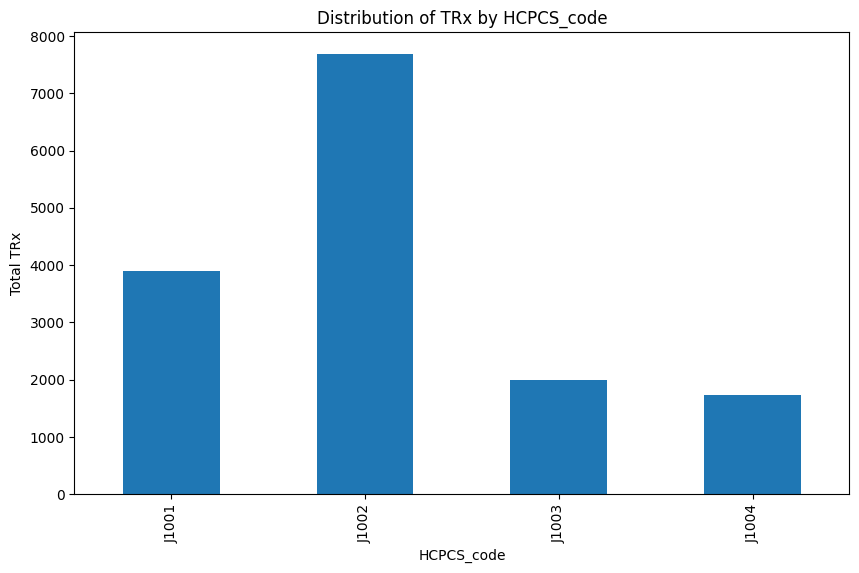

In [789]:
import matplotlib.pyplot as plt

# Calculate the distribution of TRx by HCPCS_code
trx_distribution = prescription_data.groupby('HCPCS_ code')['TRx'].sum()

# Plot the distribution
plt.figure(figsize=(10, 6))
trx_distribution.plot(kind='bar')
plt.title('Distribution of TRx by HCPCS_code')
plt.xlabel('HCPCS_code')
plt.ylabel('Total TRx')
plt.show()

In [790]:
LOT_data['claim_count'].describe()

,claim_count
count,583.000000
mean,5.528302
std,6.897044
min,1.000000
25%,2.000000
50%,2.000000
75%,6.000000
max,29.000000


# HCP Level Feature Creation

#### HCP Level Sales Feature

In [791]:
# Creation of Sales Features
prescription_data_with_brand_names = pd.merge(prescription_data,product_code,on='HCPCS_ code',how="left")
prescription_data_with_brand_names.head()

hcp_level_trx_data = prescription_data_with_brand_names.pivot_table(columns="Product Name",index=['HCP_ID'],values="TRx",fill_value=0,aggfunc="sum").rename_axis(columns=None).reset_index()
hcp_level_trx_data['Competitor'] = hcp_level_trx_data['AZNertrib'] + hcp_level_trx_data['BMSRizi'] + hcp_level_trx_data['NOVmatinib']

hcp_level_sales_data = hcp_level_trx_data[['HCP_ID','Ticaprant','Competitor']]
hcp_level_sales_data.columns = ['HCP_ID','prescription_sales_ticaprant','prescription_sales_competitor']
hcp_level_sales_data

,HCP_ID,prescription_sales_ticaprant,prescription_sales_competitor
0,HCP_01,0,410
1,HCP_02,40,60
2,HCP_05,110,80
3,HCP_06,100,140
4,HCP_09,180,180
5,HCP_11,80,150
6,HCP_16,0,560
7,HCP_17,290,220
8,HCP_20,70,30
9,HCP_21,0,430


#### Joining mNSCLC data with Product Mapping and Procedure Mapping

In [792]:
mNSCLC_df = claims_df[claims_df['Pat_ID'].isin(mNSCLC_List['mNSCLC_Patients'].tolist())]

In [793]:
mapped_df = pd.merge(pd.merge(mNSCLC_df,product_code, how = 'left', on = 'HCPCS_ code'), procedure_code, how = 'left', on = 'HCPCS_ code')

#### HCP Level Count Features

In [794]:
# mNSCLC Patient count at HCP Level
mNSCLC_count = mNSCLC_df.groupby('HCP_ID')['Pat_ID'].agg(
    mNSCLC_patient_count = lambda x:x.nunique()
)

In [795]:
# EGFR Patient count at HCP Level
egfr_data = mapped_df[mapped_df['Procedure Name'] == 'EGFR test']
egfr_count = egfr_data.groupby('HCP_ID')['Pat_ID'].agg(
    egfr_patient_count = lambda x:x.nunique()
)

In [796]:
# Brand Patient Count at HCP Level
brand_data =  mapped_df[mapped_df['Product Name'] == 'Ticaprant']
brand_count = brand_data.groupby('HCP_ID')['Pat_ID'].agg(
    ticaprant_patient_count = lambda x:x.nunique()
)

In [797]:
# Competitor Patient Count at HCP Level
competitor_data =  mapped_df[mapped_df['Product Name'].isin(['BMSRizi','NOVmatinib','AZNertrib'])]
competitor_count = competitor_data.groupby('HCP_ID')['Pat_ID'].agg(
    competitor_patient_count = lambda x:x.nunique()
)

In [798]:
# Collating count features
hcp_level_count_feature = pd.merge(pd.merge(pd.merge(mNSCLC_count, egfr_count, how = 'outer', on = 'HCP_ID'),brand_count,how = 'outer', on = 'HCP_ID'), competitor_count, how = 'outer', on = 'HCP_ID')

#### Collating the data

In [799]:
hcp_level_final_data = pd.merge(hcp_level_sales_data,hcp_level_count_feature, how = 'outer', on='HCP_ID')

#### Saving the final result

In [800]:
hcp_level_final_data.to_csv('hcp_level_final_data.csv', index = None)

# Feature Creation from Patient x LOT data
- Use LOT Data

#### Patient count in LOT

In [801]:
LOT_data.head()

start_date    end_date  claim_count
Pat_ID      Lot number HCP_ID Regimen                                     
PATIENT_001 1          HCP_17          04-21-2021  06-16-2021            2
            2          HCP_17 RIZ_TIC  09-08-2021  11-22-2022           24
PATIENT_002 1          HCP_01          04-25-2021  06-20-2021            2
            2          HCP_01 ERT_NOV  09-12-2021  01-12-2023           26
PATIENT_003 1          HCP_28          07-22-2021  09-16-2021            2

In [802]:
LOT_data = LOT_data.reset_index()

In [803]:
LOT_data.head()

,Pat_ID,Lot number,HCP_ID,Regimen,start_date,end_date,claim_count
0,PATIENT_001,1,HCP_17,,04-21-2021,06-16-2021,2
1,PATIENT_001,2,HCP_17,RIZ_TIC,09-08-2021,11-22-2022,24
2,PATIENT_002,1,HCP_01,,04-25-2021,06-20-2021,2
3,PATIENT_002,2,HCP_01,ERT_NOV,09-12-2021,01-12-2023,26
4,PATIENT_003,1,HCP_28,,07-22-2021,09-16-2021,2


In [804]:
# Creation of 1L and 2L patient count column
count_feature = LOT_data.groupby('HCP_ID')['Lot number'].agg(
    feature_1L_patient_count = lambda x:(x==1).sum(),
    feature_2L_patient_count = lambda x: (x==2).sum()
)

#### Days in LOT features

In [805]:
# typecasting the date to datetime format
LOT_data['start_date'] = pd.to_datetime(LOT_data['start_date'])
LOT_data['end_date'] = pd.to_datetime(LOT_data['end_date'])

# calculation of number of days
LOT_data["nos_day"] = (LOT_data['end_date'] - LOT_data['start_date']).dt.days

In [806]:
# Seperating the 1L and 2L LOT data
patient_1L = LOT_data[LOT_data['Lot number'] == 1]
patient_2L = LOT_data[LOT_data['Lot number'] == 2]

In [807]:
# calculation of average day count
# Avg 1L
date_average_1L = patient_1L.groupby('HCP_ID')['nos_day'].agg(
    feature_days_in_1L_avg = lambda x:x.mean()

)
# Avg 2L
date_average_2L = patient_2L.groupby('HCP_ID')['nos_day'].agg(
    feature_days_in_2L_avg = lambda x:x.mean()

)

#### Collating Data

In [808]:
# Aggregating Feature
final_lot_feature_df = count_feature.merge(date_average_1L, on= 'HCP_ID', how = 'left').merge(date_average_2L, on= 'HCP_ID', how = 'left')

In [809]:
# Saving features
final_lot_feature_df.to_csv('patientXLOT_feature.csv')

In [810]:
final_lot_feature_df

,feature_1L_patient_count,feature_2L_patient_count,feature_days_in_1L_avg,feature_days_in_2L_avg
HCP_ID,,,,
HCP_01,3,3,56.00,453.666667
HCP_02,2,2,56.00,405.000000
HCP_03,4,4,56.00,385.500000
HCP_05,4,4,56.00,396.000000
HCP_06,4,4,56.00,406.000000
...,...,...,...,...
HCP_89,1,0,47.00,NaN
HCP_90,6,5,27.50,73.600000
HCP_91,2,1,95.00,0.000000


In [811]:
hcp_level_final_features = pd.merge(hcp_level_final_data,final_lot_feature_df, how = 'outer', on='HCP_ID')
hcp_level_final_features

,HCP_ID,prescription_sales_ticaprant,prescription_sales_competitor,mNSCLC_patient_count,egfr_patient_count,ticaprant_patient_count,competitor_patient_count,feature_1L_patient_count,feature_2L_patient_count,feature_days_in_1L_avg,feature_days_in_2L_avg
0,HCP_01,0.0,410.0,3.0,3.0,NaN,3.0,3.0,3.0,56.00,453.666667
1,HCP_02,40.0,60.0,2.0,2.0,1.0,1.0,2.0,2.0,56.00,405.000000
2,HCP_03,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,56.00,385.500000
3,HCP_05,110.0,80.0,4.0,3.0,2.0,2.0,4.0,4.0,56.00,396.000000
4,HCP_06,100.0,140.0,4.0,3.0,3.0,3.0,4.0,4.0,56.00,406.000000
...,...,...,...,...,...,...,...,...,...,...,...
83,HCP_89,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,47.00,NaN
84,HCP_90,NaN,NaN,6.0,4.0,5.0,5.0,6.0,5.0,27.50,73.600000
85,HCP_91,NaN,NaN,2.0,1.0,1.0,2.0,2.0,1.0,95.00,0.000000
86,HCP_92,NaN,NaN,4.0,NaN,2.0,4.0,3.0,3.0,31.00,153.333333


In [812]:
hcp_level_final_features.fillna(0.0,inplace=True)
hcp_level_final_features

,HCP_ID,prescription_sales_ticaprant,prescription_sales_competitor,mNSCLC_patient_count,egfr_patient_count,ticaprant_patient_count,competitor_patient_count,feature_1L_patient_count,feature_2L_patient_count,feature_days_in_1L_avg,feature_days_in_2L_avg
0,HCP_01,0.0,410.0,3.0,3.0,0.0,3.0,3.0,3.0,56.00,453.666667
1,HCP_02,40.0,60.0,2.0,2.0,1.0,1.0,2.0,2.0,56.00,405.000000
2,HCP_03,0.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,56.00,385.500000
3,HCP_05,110.0,80.0,4.0,3.0,2.0,2.0,4.0,4.0,56.00,396.000000
4,HCP_06,100.0,140.0,4.0,3.0,3.0,3.0,4.0,4.0,56.00,406.000000
...,...,...,...,...,...,...,...,...,...,...,...
83,HCP_89,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,47.00,0.000000
84,HCP_90,0.0,0.0,6.0,4.0,5.0,5.0,6.0,5.0,27.50,73.600000
85,HCP_91,0.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,95.00,0.000000
86,HCP_92,0.0,0.0,4.0,0.0,2.0,4.0,3.0,3.0,31.00,153.333333


In [813]:
hcp_level_final_features.to_csv('HCP_level_final_features.csv')

In [814]:
hcp_level_final_features.describe()

,prescription_sales_ticaprant,prescription_sales_competitor,mNSCLC_patient_count,egfr_patient_count,ticaprant_patient_count,competitor_patient_count,feature_1L_patient_count,feature_2L_patient_count,feature_days_in_1L_avg,feature_days_in_2L_avg
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,44.318182,129.772727,3.954545,2.045455,1.579545,2.954545,3.477273,3.147727,40.852458,195.478193
std,65.351313,181.126597,1.982157,1.492580,1.498824,2.138369,1.787423,1.657722,24.686353,157.471010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,15.250000,69.450000
50%,0.000000,0.000000,4.000000,2.000000,1.000000,3.000000,3.000000,3.000000,50.500000,130.000000
75%,90.000000,292.500000,5.000000,3.000000,3.000000,4.000000,4.250000,4.000000,56.000000,385.125000
max,290.000000,710.000000,11.000000,6.000000,6.000000,11.000000,9.000000,7.000000,111.000000,461.500000


In [815]:
import pandas as pd
import numpy as np

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('HCP_level_final_features.csv')

# Desired distribution parameters (adjust according to the target distribution)
target_stats = {
    'prescription_sales_ticaprant': {'mean': 46.55, 'std': 68.99, 'min': 0, 'max': 290},
    'prescription_sales_competitor': {'mean': 136.21, 'std': 181.16, 'min': 0, 'max': 710},
    'mNSCLC_patient_count': {'mean': 3.45, 'std': 1.30, 'min': 2, 'max': 6},
    'egfr_patient_count': {'mean': 2.41, 'std': 1.76, 'min': 0, 'max': 6},
    'ticaprant_patient_count': {'mean': 1.03, 'std': 1.40, 'min': 0, 'max': 5},
    'competitor_patient_count': {'mean': 1.79, 'std': 1.76, 'min': 0, 'max': 6},
    'feature_1L_patient_count': {'mean': 1.79, 'std': 1.76, 'min': 0, 'max': 6},
    'feature_2L_patient_count': {'mean': 1.62, 'std': 1.50, 'min': 0, 'max': 5},
    'feature_days_in_1L_avg': {'mean': 70.03, 'std': 62.15, 'min': 0, 'max': 180},
    'feature_days_in_2L_avg': {'mean': 45.32, 'std': 48.69, 'min': 0, 'max': 139.75}
}

# Adjust each column to match the target distribution
for col, stats in target_stats.items():
    if col in data.columns:
        # Generate synthetic data following a normal distribution with the target stats
        synthetic_data = np.random.normal(
            loc=stats['mean'], scale=stats['std'], size=len(data)
        )
        # Clip the data to keep within min and max range
        synthetic_data = np.clip(synthetic_data, stats['min'], stats['max'])

        # Replace the column with the synthetic data
        data[col] = synthetic_data

# Save the modified dataset
data.to_csv('modified_dataset.csv', index=False)
print("Dataset adjusted to match target distribution and saved as 'modified_dataset.csv'")


Dataset adjusted to match target distribution and saved as 'modified_dataset.csv'


In [816]:
data.describe()

,Unnamed: 0,prescription_sales_ticaprant,prescription_sales_competitor,mNSCLC_patient_count,egfr_patient_count,ticaprant_patient_count,competitor_patient_count,feature_1L_patient_count,feature_2L_patient_count,feature_days_in_1L_avg,feature_days_in_2L_avg
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,43.500000,62.556727,164.856214,3.613680,2.542478,1.193524,2.028110,1.800708,1.812125,71.225700,47.856618
std,25.547342,57.017881,157.584674,1.312195,1.647567,1.134940,1.418258,1.554355,1.298312,53.241652,38.882006
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.750000,2.838274,1.118930,2.329662,1.305774,0.000000,0.841246,0.301613,0.716785,27.682989,15.732912
50%,43.500000,55.696510,124.641510,3.640538,2.394791,1.106580,1.965481,1.548765,1.786819,64.383960,48.176458
75%,65.250000,101.095069,259.389314,4.626737,3.539914,1.895996,3.038573,2.896943,2.832684,112.730966,70.504096
max,87.000000,200.614792,690.189493,6.000000,6.000000,4.077753,5.202058,5.780129,5.000000,180.000000,139.750000


# Feature Creation (continued)

# Loading dataset

In [817]:
df = pd.read_csv('claim_level_data.csv')
pat_df = pd.read_csv('Patient_cohort_table_final.csv')

In [818]:
df.head()

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,Procedure Name,Product Category,Product Abbreviation,flag,YM,Gap,Lot number,start_date,end_date,Regimen
0,PATIENT_001,HCP_17,250748,J9999,04-21-2021,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,202104,0,1,04-21-2021,06-16-2021,NaN
1,PATIENT_001,HCP_17,268985,G9418,06-16-2021,I10,NaN,NaN,NaN,NaN,Biopsy,NaN,NaN,2,202106,56,1,04-21-2021,06-16-2021,NaN
2,PATIENT_001,HCP_17,277492,J9999,09-08-2021,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,202109,84,2,09-08-2021,11-22-2022,RIZ_TIC
3,PATIENT_001,HCP_17,286233,J9999,10-06-2021,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,202110,28,2,09-08-2021,11-22-2022,RIZ_TIC
4,PATIENT_001,HCP_17,302457,J9999,11-03-2021,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,202111,28,2,09-08-2021,11-22-2022,RIZ_TIC


In [819]:
df[df['Gap']<0]

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,Procedure Name,Product Category,Product Abbreviation,flag,YM,Gap,Lot number,start_date,end_date,Regimen


In [820]:
df['Product Category'].value_counts()

,count
Product Category,
Market Basket,797
Chemotherapy,583


In [821]:
df['Regimen'].value_counts()

,count
Regimen,
NOV_TIC,447
ERT_NOV,377
NOV,274
RIZ,136
ERT_TIC,119
RIZ_TIC,102
NOV_RIZ,88
ERT,87
TIC,77


# Outliers

- Never prescribed any product
- Claim count is two

In [822]:
# Step 1: Count claims per patient
claim_count = df.groupby('Pat_ID')['Claim ID'].nunique()

# Step 2: Filter for patients with exactly 2 claims
patients_with_two_claims = claim_count[claim_count == 2].index

# Step 3: Identify patients never prescribed any products (Product Name is NaN)
patients_no_products = df[df['Product Name'].isna()]['Pat_ID'].unique()

# Step 4: Get the intersection of patients with two claims and no prescribed products
result_patients = [pat for pat in patients_with_two_claims if pat in patients_no_products]

# Display result count
result_count = len(result_patients)
result_count

30

In [823]:
filtered_df = df[df['Pat_ID'].isin(result_patients) & df['Diagnosis 2'].str.startswith('C78')]
grouped_counts = filtered_df.groupby(['Pat_ID', 'Diagnosis 2']).size().reset_index(name='Count')
grouped_counts['Diagnosis 2'].value_counts()

,count
Diagnosis 2,
C78.8,7
C78.5,5
C78.4,5
C78.7,4
C78.3,2
C78,2


In [824]:
filtered_df['Pat_ID'].nunique()

20

In [825]:
df = df[~df['Pat_ID'].isin(result_patients)]
df.shape

(3163, 20)

In [826]:
df['Pat_ID'].nunique()

276

In [827]:
# Filter patients diagnosed with C34 in any of the four diagnosis columns
patients_with_c34 = df[
    df[['Diagnosis 1', 'Diagnosis 2', 'Diagnosis 3', 'Diagnosis 4']]
    .apply(lambda x: x.astype(str).str.startswith('C34')).any(axis=1)
]['Pat_ID'].unique()

len(patients_with_c34)

276

# Count of patients on a line

In [828]:
# 1. Count of patients on a line
patients_on_line = df.groupby('Lot number')['Pat_ID'].nunique()
print("Count of patients on a line:")
print(patients_on_line)

Count of patients on a line:
Lot number
1    276
2    258
Name: Pat_ID, dtype: int64


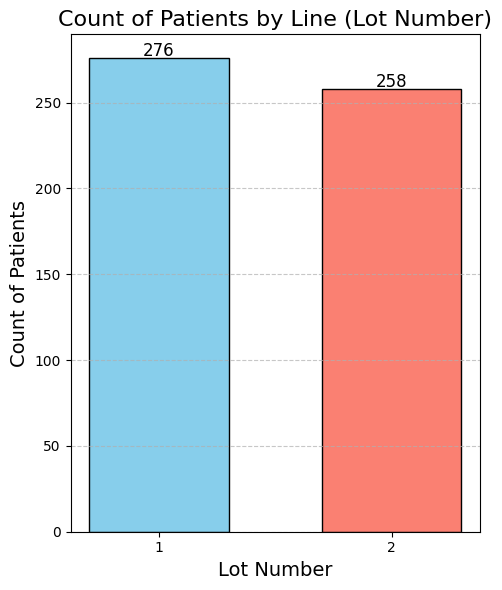

In [829]:
import matplotlib.pyplot as plt

# Data for the plot
categories = ['1', '2']
counts = patients_on_line.values  # Replace with actual data

# Plotting the bar chart
plt.figure(figsize=(5, 6))  # Set the figure size
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'], edgecolor='black', width=0.6)

# Add titles and labels
plt.title('Count of Patients by Line (Lot Number)', fontsize=16)
plt.xlabel('Lot Number', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)

# Add data labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        bar.get_height() + 1,              # Slightly above the bar
        f'{int(bar.get_height())}',        # Display the count
        ha='center',
        fontsize=12
    )

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure the layout fits well
plt.tight_layout()

# Show the plot
plt.show()

# Number of patients in L1 last year

In [830]:
# Convert dates to datetime
df['Transaction date'] = pd.to_datetime(df['Transaction date'], format='%m-%d-%Y')
df['start_date'] = pd.to_datetime(df['start_date'], format='%m-%d-%Y')
df['end_date'] = pd.to_datetime(df['end_date'], format='%m-%d-%Y')

In [831]:
# Extract the year from the 'Transaction date' column
df['Year'] = df['Transaction date'].dt.year

# Find the most recent year in the dataset
last_year = df['Year'].max()

print(f"The last year in the dataset is: {last_year}")

The last year in the dataset is: 2023


In [832]:
# Filter for last year
last_year_start = pd.Timestamp('2022-01-01')
last_year_end = pd.Timestamp('2022-12-31')

In [833]:
# 2. Number of patients in L1 last year
patients_in_L1_last_year = df[(df['Lot number'] == 1) &
                              (df['Transaction date'].between(last_year_start, last_year_end))]['Pat_ID'].nunique()
print("\nNumber of patients in L1 last year:", patients_in_L1_last_year)


Number of patients in L1 last year: 176


# Number of patients in L1 last year

In [834]:
# 2. Number of patients in L1 last year
patients_in_L2_last_year = df[(df['Lot number'] == 2) &
                              (df['Transaction date'].between(last_year_start, last_year_end))]['Pat_ID'].nunique()
print("\nNumber of patients in L2 last year:", patients_in_L2_last_year)


Number of patients in L2 last year: 258


# Number of patients in L1 last year for a specific product

In [835]:
# 3. Number of patients in L1 last year for a specific product
product_name = 'Ticaprant'  # Change this to the product name of interest
patients_in_L1_last_year_for_product = df[(df['Lot number'] == 1) &
                                          (df['Transaction date'].between(last_year_start, last_year_end)) &
                                          (df['Product Name'] == product_name)]['Pat_ID'].nunique()
print(f"\nNumber of patients in L1 last year for {product_name}:", patients_in_L1_last_year_for_product)


Number of patients in L1 last year for Ticaprant: 18


# Number of patients in L2 last year for a specific product

In [836]:
# 3. Number of patients in L2 last year for a specific product
product_name = 'Ticaprant'  # Change this to the product name of interest
patients_in_L2_last_year_for_product = df[(df['Lot number'] == 2) &
                                          (df['Transaction date'].between(last_year_start, last_year_end)) &
                                          (df['Product Name'] == product_name)]['Pat_ID'].nunique()
print(f"\nNumber of patients in L2 last year for {product_name}:", patients_in_L2_last_year_for_product)


Number of patients in L2 last year for Ticaprant: 51


# Patients in the 1st line for our product in Chemo (last year)

In [837]:
df['Product Name'].value_counts()

,count
Product Name,
Paclitaxel,338
NOVmatinib,335
Pemetrexed,245
Ticaprant,195
AZNertrib,145
BMSRizi,122


In [838]:
chemo_patients = pat_df[pat_df['Chemo Patients'] == 1]['Pat_ID'].unique()

In [839]:
# 5. Patients in the 1st line for our product in Chemo (last year)
chemo_patients_L1 = df[(df['Lot number'] == 1) &
                       (df['Pat_ID'].isin(chemo_patients)) &
                       (df['Product Name'] == 'Ticaprant') &
                       (df['Transaction date'].between(last_year_start, last_year_end))]['Pat_ID'].nunique()
print("\nPatients in the 1st line for our product in Chemo (last year):")
print(chemo_patients_L1)


Patients in the 1st line for our product in Chemo (last year):
14


# 5. Patients in the 2nd line for our product in Chemo (last year)

In [840]:
# 5. Patients in the 2nd line for our product in Chemo (last year)
chemo_patients_L2 = df[(df['Lot number'] == 2) &
                       (df['Pat_ID'].isin(chemo_patients)) &
                       (df['Product Name'] == 'Ticaprant') &
                       (df['Transaction date'].between(last_year_start, last_year_end))]['Pat_ID'].nunique()
print("\nPatients in the 1st line for our product in Chemo (last year):")
print(chemo_patients_L2)


Patients in the 1st line for our product in Chemo (last year):
20


# Patients in the 1st line for our product in EGFR (last year)

In [841]:
pat_df.head()

,Pat_ID,NSCLC Patients,mNSCLC Patients,mNSCLC_egfr Patients,mNSCLC_egfr_MKT Patients,mNSCLC_egfr_Ticaprant Patients,Chemo Patients,first_NSCLC_diagnosis_date,first_mNSCLC_diagnosis_date,first_egfr_date,last_egfr_date
0,PATIENT_001,1,1,1,1,1,0,20211229,20211229.0,20211229.0,20221122.0
1,PATIENT_002,1,1,1,1,0,0,20220102,20220102.0,20220102.0,20230112.0
2,PATIENT_003,1,1,1,1,1,0,20220331,20220331.0,20220331.0,20221228.0
3,PATIENT_004,1,1,1,1,0,0,20220310,20220310.0,20220310.0,20221125.0
4,PATIENT_005,1,1,1,1,0,0,20211224,20211224.0,20211224.0,20221219.0


In [842]:
egfr_patients = pat_df[pat_df['mNSCLC_egfr Patients'] == 1]['Pat_ID'].unique()

In [843]:
# 6. Patients in the 1st line for our product in EGFR (last year)
egfr_patients_L1 = df[(df['Lot number'] == 1) &
                      (df['Pat_ID'].isin(egfr_patients)) &
                      (df['Product Name'] == 'Ticaprant')&
                      (df['Transaction date'].between(last_year_start, last_year_end))]['Pat_ID'].nunique()
print("\nPatients in the 1st line for our product in EGFR (last year):")
print(egfr_patients_L1)


Patients in the 1st line for our product in EGFR (last year):
6


# Patients in the 2nd line for our product in EGFR (last year)

In [844]:
# 6. Patients in the 2nd line for our product in EGFR (last year)
egfr_patients_L2 = df[(df['Lot number'] == 2) &
                      (df['Pat_ID'].isin(egfr_patients)) &
                      (df['Product Name'] == 'Ticaprant')&
                      (df['Transaction date'].between(last_year_start, last_year_end))]['Pat_ID'].nunique()
print("\nPatients in the 1st line for our product in EGFR (last year):")
print(egfr_patients_L2)


Patients in the 1st line for our product in EGFR (last year):
30


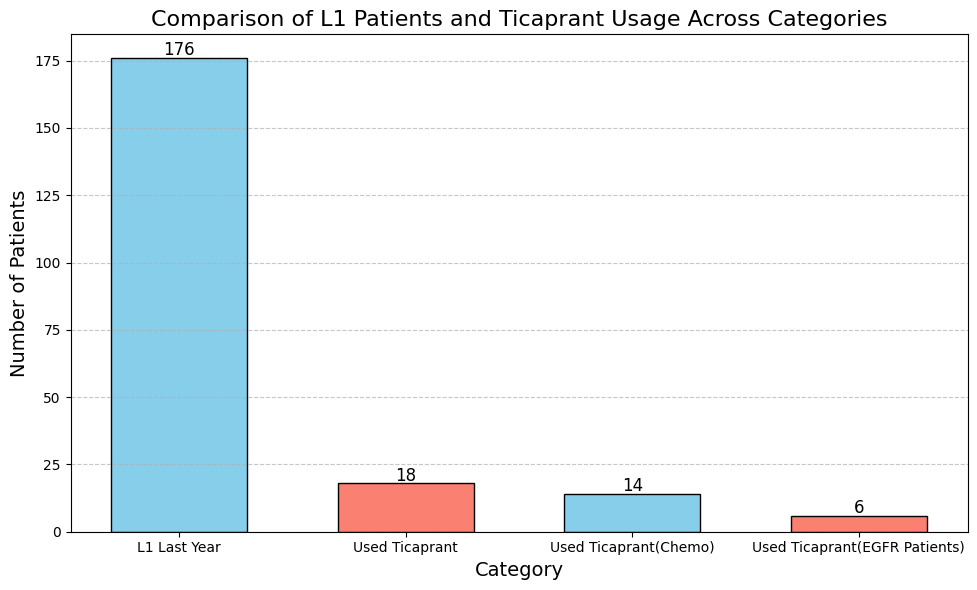

In [845]:
import matplotlib.pyplot as plt

# Data for the plot
categories = ['L1 Last Year', 'Used Ticaprant','Used Ticaprant(Chemo)','Used Ticaprant(EGFR Patients)']
counts = [patients_in_L1_last_year, patients_in_L1_last_year_for_product,chemo_patients_L1,egfr_patients_L1]  # Replace with actual data

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'], edgecolor='black', width=0.6)

# Add titles and labels
plt.title('Comparison of L1 Patients and Ticaprant Usage Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Add data labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        bar.get_height() + 1,              # Slightly above the bar
        f'{int(bar.get_height())}',        # Display the count
        ha='center',
        fontsize=12
    )

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure the layout fits well
plt.tight_layout()

# Show the plot
plt.show()

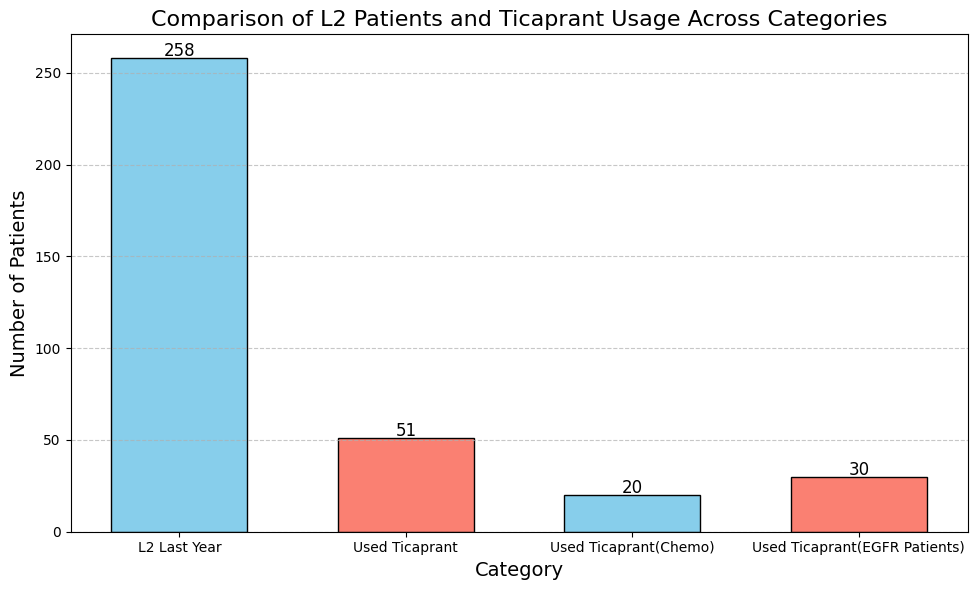

In [846]:
import matplotlib.pyplot as plt

# Data for the plot
categories = ['L2 Last Year', 'Used Ticaprant','Used Ticaprant(Chemo)','Used Ticaprant(EGFR Patients)']
counts = [patients_in_L2_last_year, patients_in_L2_last_year_for_product,chemo_patients_L2,egfr_patients_L2]  # Replace with actual data

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'], edgecolor='black', width=0.6)

# Add titles and labels
plt.title('Comparison of L2 Patients and Ticaprant Usage Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Add data labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        bar.get_height() + 1,              # Slightly above the bar
        f'{int(bar.get_height())}',        # Display the count
        ha='center',
        fontsize=12
    )

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure the layout fits well
plt.tight_layout()

# Show the plot
plt.show()

In [847]:
df['HCP_ID'].nunique()

84

In [848]:
df['Pat_ID'].nunique()

276

# Average days spent by a HCP in a line 1

## Variability Data

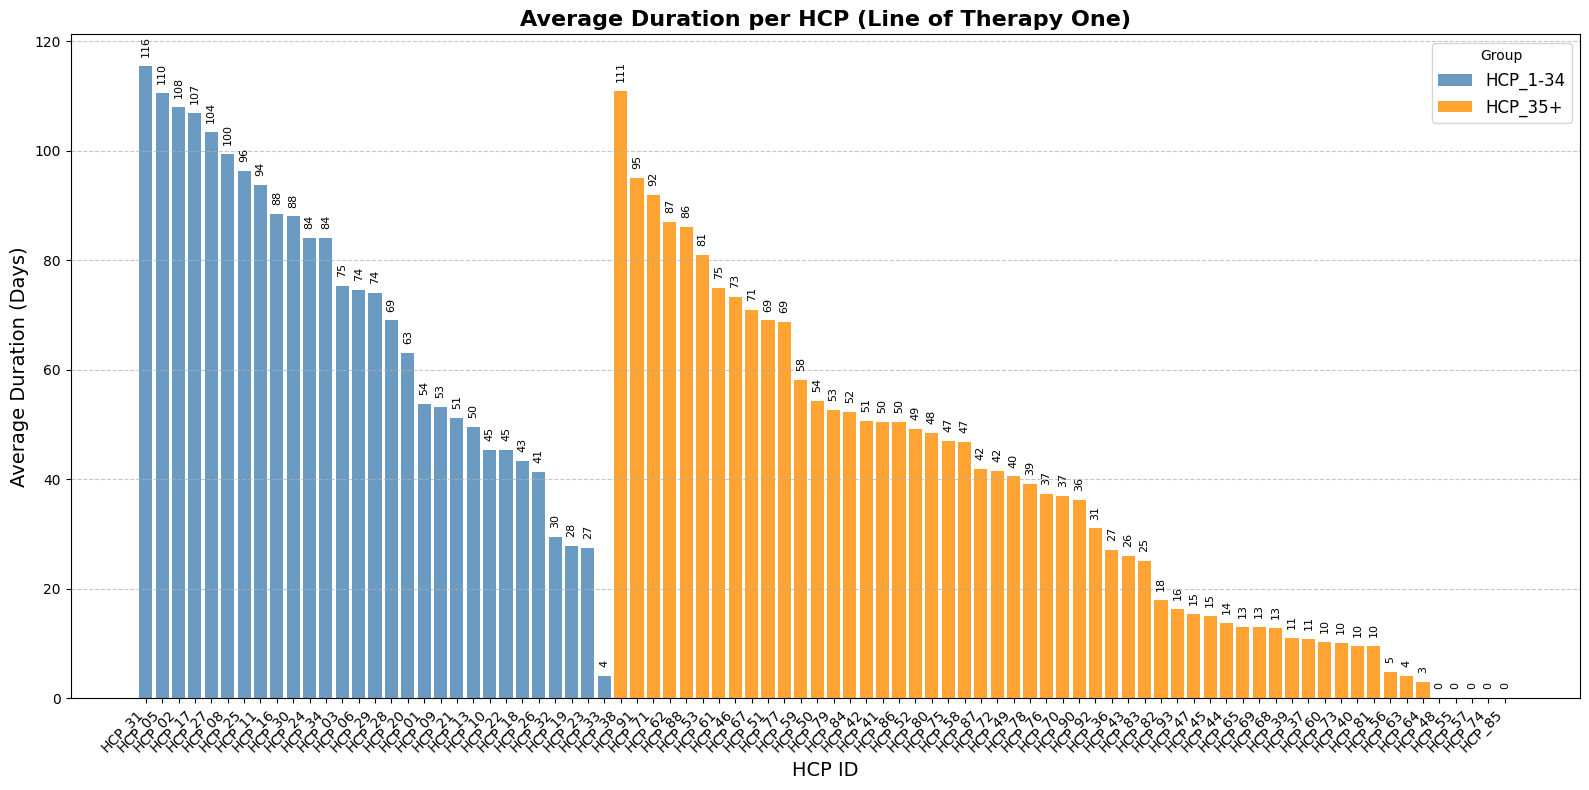

In [849]:
hcp_list = [f'HCP_{str(i).zfill(2)}' for i in range(1, 36)]
num_rows = df[df['HCP_ID'].isin(hcp_list)].shape[0]
shifts = np.random.normal(loc=0, scale=45, size=num_rows)
df_hcp_1_35 = df[df['HCP_ID'].isin(hcp_list)].copy().reset_index(drop=True)
df_hcp_1_35 = df[df['HCP_ID'].isin(hcp_list)].copy()
df_hcp_1_35 = df_hcp_1_35.reset_index(drop=True)
num_rows = df_hcp_1_35.shape[0]
shifts = np.random.normal(loc=0, scale=45, size=num_rows)  # e.g., ±45 days
shifts_rounded = shifts.round().astype(int)
df_hcp_1_35['Transaction date'] = df_hcp_1_35['Transaction date'] + pd.to_timedelta(shifts_rounded, unit='D')
df_modified = df.copy()
df_modified.loc[df_modified['HCP_ID'].isin(hcp_list), 'Transaction date'] = df_hcp_1_35['Transaction date']
therapy_one_data = df_modified[df_modified['Lot number'] == 1]
hcp_patient_days = (
    therapy_one_data
    .groupby(['HCP_ID', 'Pat_ID'])['Transaction date']
    .agg(['min', 'max'])
    .reset_index()
)
hcp_patient_days['Duration'] = (hcp_patient_days['max'] - hcp_patient_days['min']).dt.days
hcp_avg_days = hcp_patient_days.groupby('HCP_ID')['Duration'].mean().reset_index()
def hcp_group(x):
    number = int(x.split('_')[1])
    return 'HCP_1-34' if number <= 34 else 'HCP_35+'
hcp_avg_days['Group'] = hcp_avg_days['HCP_ID'].apply(hcp_group)
hcp_avg_days = hcp_avg_days.sort_values(by=['Group','Duration'], ascending=[True,False])
plt.figure(figsize=(16, 8))
colors = {'HCP_1-34': 'steelblue', 'HCP_35+': 'darkorange'}
for group in hcp_avg_days['Group'].unique():
    subset = hcp_avg_days[hcp_avg_days['Group'] == group]
    plt.bar(subset['HCP_ID'], subset['Duration'],
            color=colors[group], alpha=0.8, label=group)

# Annotate each bar (optional)
for idx, row in hcp_avg_days.iterrows():
    plt.text(row['HCP_ID'], row['Duration'] + 2,
             f"{row['Duration']:.0f}",
             ha='center', fontsize=8, rotation=90)

# Styling
plt.title('Average Duration per HCP (Line of Therapy One)', fontsize=16, weight='bold')
plt.xlabel('HCP ID', fontsize=14)
plt.ylabel('Average Duration (Days)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Group', fontsize=12)
plt.tight_layout()

plt.show()

In [850]:
hcp_patient_days['Pat_ID'].nunique()

276

In [851]:
# Patients who spent zero days in L1
hcp_patient_days[hcp_patient_days['Duration']==0]

,HCP_ID,Pat_ID,min,max,Duration
104,HCP_37,PATIENT_281,2022-06-18,2022-06-18,0.0
105,HCP_37,PATIENT_358,2022-01-16,2022-01-16,0.0
108,HCP_37,PATIENT_403,2022-05-23,2022-05-23,0.0
111,HCP_39,PATIENT_423,2022-01-19,2022-01-19,0.0
112,HCP_40,PATIENT_346,2022-01-15,2022-01-15,0.0
...,...,...,...,...,...
262,HCP_87,PATIENT_302,2022-04-17,2022-04-17,0.0
266,HCP_90,PATIENT_345,2022-01-19,2022-01-19,0.0
269,HCP_91,PATIENT_332,2022-06-11,2022-06-11,0.0
272,HCP_92,PATIENT_391,2022-01-19,2022-01-19,0.0


In [852]:
# Count of patients(unique) who spent zero days in L1
hcp_patient_days[hcp_patient_days['Duration']==0]['Pat_ID'].nunique()

71

In [853]:
# Count of HCPs(unique) who spent zero days in L1
hcp_patient_days[hcp_patient_days['Duration']==0]['HCP_ID'].nunique()

45

# Patients transitioned into L2 after initial visit

In [854]:
# Patient transitioned into L2 after initial visit
df[df['Pat_ID']=='PATIENT_281'][['Pat_ID','HCP_ID','Transaction date','Lot number','Gap','Product Name']]

,Pat_ID,HCP_ID,Transaction date,Lot number,Gap,Product Name
2672,PATIENT_281,HCP_37,2022-06-18,1,0,Paclitaxel
2673,PATIENT_281,HCP_37,2022-08-26,2,69,Paclitaxel


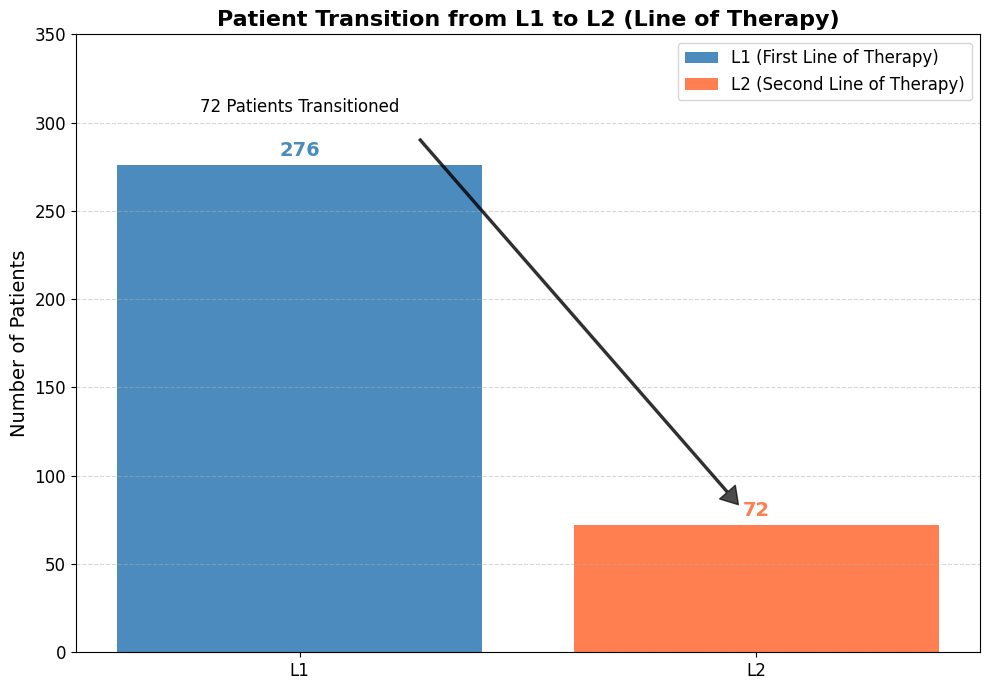

In [855]:
# Data for the plot
l1_count = 276  # Number of patients in L1
l2_count = 72

plt.figure(figsize=(10, 7))
plt.bar(['L1'], [l1_count], color='#4B8BBE', label='L1 (First Line of Therapy)')  # Blue shade for L1
plt.bar(['L2'], [l2_count], color='#FF7F50', label='L2 (Second Line of Therapy)')  # Coral shade for L2

# Drawing the transition arrow with better styling
plt.annotate(
    '72 Patients Transitioned',  # Text to display
    xy=('L2', l2_count),  # Arrow tip (L2 bar)
    xytext=('L1', l1_count + 30),  # Arrow start (L1 bar, slightly above for visibility)
    arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=15, alpha=0.7),
    fontsize=12,
    ha='center'
)

# Adding numerical labels directly on bars
plt.text(0, l1_count + 5, f'{l1_count}', ha='center', fontsize=14, fontweight='bold', color='#4B8BBE')
plt.text(1, l2_count + 5, f'{l2_count}', ha='center', fontsize=14, fontweight='bold', color='#FF7F50')

# Labels and title
plt.ylabel('Number of Patients', fontsize=14)
plt.title('Patient Transition from L1 to L2 (Line of Therapy)', fontsize=16, fontweight='bold')
plt.ylim(0, 350)  # Set y-limit for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [856]:
patients = hcp_patient_days[hcp_patient_days['Duration']==0]['Pat_ID'].unique()

In [857]:
df[df['Pat_ID'].isin(patients)]['Gap'].mean()

np.float64(50.25993883792049)

In [858]:
df[df['Pat_ID'].isin(patients)]['Regimen'].value_counts()

,count
Regimen,
TIC,42
NOV,41
RIZ,40
ERT,31
ERT_RIZ,10
NOV_TIC,8
RIZ_TIC,6
ERT_TIC,5


In [859]:
# Verifying if all the patient transitioned into L2 after initial visit

# Step 1: Filter patients of interest
filtered_df = df[df['Pat_ID'].isin(patients)].copy()

# Step 2: Identify the first LOT 1 occurrence for each patient
filtered_df.loc[:, 'first_lot1_date'] = (
    filtered_df.loc[filtered_df['Lot number'] == 1]
    .groupby('Pat_ID')['Transaction date']
    .transform('min')
)

# Step 3: Fill NaT with the first available transaction date per patient
filtered_df['first_lot1_date'] = filtered_df.groupby('Pat_ID')['first_lot1_date'].transform(lambda x: x.fillna(x.min()))

# Step 4: Check if a transition to LOT 2 happens after the first LOT 1 date
filtered_df.loc[:, 'transition_to_lot2'] = (
    (filtered_df['Lot number'] == 2) &
    (filtered_df['Transaction date'] > filtered_df['first_lot1_date'])
)

# Step 5: Filter patients who transitioned to LOT 2 after the first LOT 1
transitioned_patients = filtered_df[filtered_df['transition_to_lot2']]

In [860]:
transitioned_patients['transition_to_lot2'].value_counts()

,count
transition_to_lot2,
True,256


In [861]:
df[df['Pat_ID'].isin(patients)]['Gap'].mean()

np.float64(50.25993883792049)

In [862]:
df[df['Pat_ID'].isin(patients)]['Diagnosis 1'].value_counts()

,count
Diagnosis 1,
C34,61
C34.1,44
C34.8,43
C34.2,42
I10,39
C34.11,38
C34.3,32
C34.12,28


# mNSCLC Patients

In [863]:
filtered_df = df[df['Pat_ID'].isin(patients) & df['Diagnosis 2'].str.startswith('C78')]
grouped_counts = filtered_df.groupby(['Pat_ID', 'Diagnosis 2']).size().reset_index(name='Count')
grouped_counts['Diagnosis 2'].value_counts()

,count
Diagnosis 2,
C78.8,26
C78.4,26
C78.7,25
C78,21
C78.3,19
C78.5,14


In [864]:
grouped_counts['Pat_ID'].nunique()

65

In [865]:
product_usage = filtered_df.groupby(['Pat_ID', 'Product Name']).size().reset_index(name='Count')
product_usage

,Pat_ID,Product Name,Count
0,PATIENT_137,BMSRizi,1
1,PATIENT_144,AZNertrib,1
2,PATIENT_150,AZNertrib,1
3,PATIENT_150,Ticaprant,1
4,PATIENT_156,AZNertrib,2
5,PATIENT_174,BMSRizi,1
6,PATIENT_174,Paclitaxel,2
7,PATIENT_174,Pemetrexed,1
8,PATIENT_184,NOVmatinib,2
9,PATIENT_189,NOVmatinib,2


In [866]:
product_usage['Product Name'].value_counts()

,count
Product Name,
Ticaprant,11
BMSRizi,10
Paclitaxel,9
NOVmatinib,8
AZNertrib,5
Pemetrexed,5


In [867]:
non_mnsclc = df[df['Pat_ID'].isin(patients)]
non_mnsclc = non_mnsclc[~non_mnsclc['Pat_ID'].isin(grouped_counts['Pat_ID'].unique())]

In [868]:
non_mnsclc['Pat_ID'].nunique()

6

In [869]:
non_mnsclc

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,...,Product Category,Product Abbreviation,flag,YM,Gap,Lot number,start_date,end_date,Regimen,Year
2295,PATIENT_170,HCP_81,391,70460,2022-03-05,C34.1,NaN,NaN,NaN,NaN,...,NaN,NaN,2,202203,0,1,2022-03-05,2022-03-05,NaN,2022
2296,PATIENT_170,HCP_81,389,J2002,2022-06-01,C34.2,NaN,NaN,NaN,Paclitaxel,...,Chemotherapy,NaN,2,202206,88,2,2022-06-01,2022-08-07,NaN,2022
2297,PATIENT_170,HCP_81,385,70460,2022-06-13,C34,NaN,S0240AA,NaN,NaN,...,NaN,NaN,2,202206,12,2,2022-06-01,2022-08-07,NaN,2022
2298,PATIENT_170,HCP_81,387,J2002,2022-08-07,C34.1,75489,S92209B,NaN,Paclitaxel,...,Chemotherapy,NaN,2,202208,55,2,2022-06-01,2022-08-07,NaN,2022
2487,PATIENT_233,HCP_60,869,J2001,2022-01-16,C34,Z72,T46903,NaN,Pemetrexed,...,Chemotherapy,NaN,2,202201,0,1,2022-01-16,2022-01-16,NaN,2022
2488,PATIENT_233,HCP_60,872,J2001,2022-10-12,C34,I10,NaN,NaN,Pemetrexed,...,Chemotherapy,NaN,2,202210,269,2,2022-10-12,2022-10-12,NaN,2022
2757,PATIENT_302,HCP_87,1436,70450,2022-04-17,C34,NaN,NaN,NaN,NaN,...,NaN,NaN,3,202204,0,1,2022-04-17,2022-04-17,NaN,2022
2758,PATIENT_302,HCP_87,1441,70450,2022-07-27,C34.8,NaN,NaN,NaN,NaN,...,NaN,NaN,3,202207,101,2,2022-07-27,2022-11-15,NaN,2022
2759,PATIENT_302,HCP_87,1438,70450,2022-11-15,C34,75489,C78.4,NaN,NaN,...,NaN,NaN,3,202211,111,2,2022-07-27,2022-11-15,NaN,2022
2931,PATIENT_351,HCP_85,1836,J9999,2022-02-18,I10,Z57.31,Q7951,NaN,NaN,...,NaN,NaN,2,202202,0,1,2022-02-18,2022-02-18,NaN,2022


- All the patients have transitioned from L1 to L2 after initial visit

# Missing Data - Replace the patients with duration of days being zero with the gap obtained by L2

In [870]:
filtered_df = df[df['Pat_ID'].isin(patients)]

# Step 1: Filter for patients in L2 (first occurrence per patient)
first_l2_gaps = (
    filtered_df[filtered_df['Lot number'] == 2]
    .groupby('Pat_ID')
    .first()['Gap']
    .reset_index()
)

# Step 2: Create a mapping of Pat_ID to first non-zero gap
gap_mapping = first_l2_gaps.set_index('Pat_ID')['Gap']

# Step 3: Fill zero durations in hcp_patient_days
hcp_patient_days['Duration'] = hcp_patient_days.apply(
    lambda x: gap_mapping[x['Pat_ID']] if x['Duration'] == 0 and x['Pat_ID'] in gap_mapping else x['Duration'],
    axis=1
)


In [871]:
# Group by HCP_ID to calculate the total and average duration for each HCP
hcp_avg_days = hcp_patient_days.groupby('HCP_ID')['Duration'].mean().reset_index()

# Calculate the overall average days per HCP
average_days_per_hcp = hcp_avg_days['Duration'].mean()

print(f"The average days per HCP for Line of Therapy One is: {average_days_per_hcp:.2f}")

The average days per HCP for Line of Therapy One is: 80.06


# Analysing patient journey of HCPs treated by HCP_01 to HCP_34

In [872]:
hcp_range = [f'HCP_{str(i).zfill(2)}' for i in range(1, 33)]
therapy_one_data_filtered = therapy_one_data[therapy_one_data['HCP_ID'].isin(hcp_range)]
therapy_one_data_filtered['Product Name'].value_counts() #No product is prescribed

,count
Product Name,


In [873]:
therapy_one_data_filtered['Product Category'].value_counts() #No chemo

,count
Product Category,


- Patients were not prescribed any market basket or chemotherapy product by HCPs 1 to 33 in L1.

# Average Duration spent by HCP in L1

In [874]:
hcp_data_filtered = hcp_avg_days

# Create a distinction between HCPs: Group HCP_1 to HCP_34 and the rest
hcp_data_filtered['Group'] = hcp_data_filtered['HCP_ID'].apply(
    lambda x: 'HCP_1-34' if int(x.split('_')[1]) < 34 else 'HCP_35+'
)

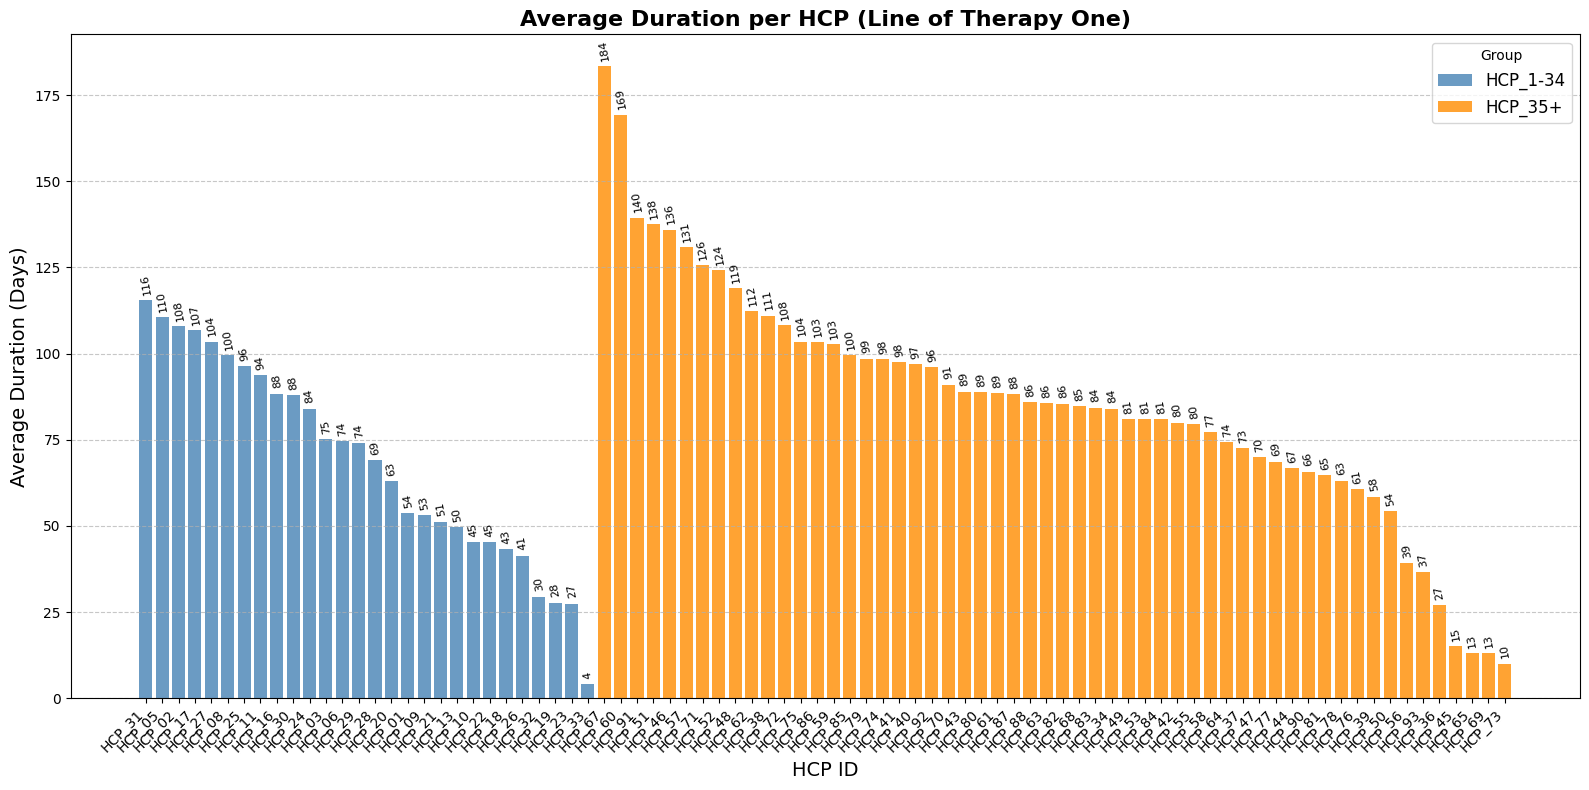

In [875]:
# Sort data by Group and Duration for better readability => monitored for 2 cycles of 28 days
hcp_data_filtered = hcp_data_filtered.sort_values(by=['Group', 'Duration'], ascending=[True, False])

# Plotting with enhanced readability
plt.figure(figsize=(16, 8))
colors = {'HCP_1-34': 'steelblue', 'HCP_35+': 'darkorange'}

for group in hcp_data_filtered['Group'].unique():
    subset = hcp_data_filtered[hcp_data_filtered['Group'] == group]
    plt.bar(subset['HCP_ID'], subset['Duration'], label=group, color=colors[group], alpha=0.8)

# Adding annotations for clarity
for idx, row in hcp_data_filtered.iterrows():
    plt.text(row['HCP_ID'], row['Duration']+2, f"{row['Duration']:.0f}", ha='center', fontsize=8, rotation=100)

# Enhanced chart labels and styles
plt.title('Average Duration per HCP (Line of Therapy One)', fontsize=16, weight='bold')
plt.xlabel('HCP ID', fontsize=14)
plt.ylabel('Average Duration (Days)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Group', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- No. of patients with duration in L1 being zero - 72
- Pattern Observed - Duration is zero since every patient transitions to L2 after initial visit

# Line of therapy two

In [876]:
# Ensure Transaction_Date is in datetime format
df['Transaction date'] = pd.to_datetime(df['Transaction date'])

# Filter for Line of Therapy One
therapy_two_data = df[df['Lot number'] == 2]

# Group by HCP_ID and Patient_ID to calculate min and max transaction dates
hcp_patient_days_two = (
    therapy_two_data.groupby(['HCP_ID', 'Pat_ID'])['Transaction date']
    .agg(['min', 'max'])
    .reset_index()
)

# Calculate the duration in days for each HCP-PATIENT pair
hcp_patient_days_two['Duration'] = (hcp_patient_days_two['max'] - hcp_patient_days_two['min']).dt.days

# Group by HCP_ID to calculate the total and average duration for each HCP
hcp_avg_days_two = hcp_patient_days_two.groupby('HCP_ID')['Duration'].mean().reset_index()

# Calculate the overall average days per HCP
average_days_per_hcp_two = hcp_avg_days_two['Duration'].mean()

print(f"The average days per HCP for Line of Therapy Two is: {average_days_per_hcp_two:.2f}")

The average days per HCP for Line of Therapy Two is: 215.95


In [877]:
patients_lot2 = hcp_patient_days_two[hcp_patient_days_two['Duration']==0]['Pat_ID'].unique()
len(patients_lot2)

29

In [878]:
patients_lot2

array(['PATIENT_162', 'PATIENT_246', 'PATIENT_185', 'PATIENT_281',
       'PATIENT_403', 'PATIENT_137', 'PATIENT_371', 'PATIENT_218',
       'PATIENT_144', 'PATIENT_194', 'PATIENT_373', 'PATIENT_128',
       'PATIENT_233', 'PATIENT_316', 'PATIENT_357', 'PATIENT_154',
       'PATIENT_370', 'PATIENT_268', 'PATIENT_242', 'PATIENT_184',
       'PATIENT_342', 'PATIENT_191', 'PATIENT_422', 'PATIENT_269',
       'PATIENT_224', 'PATIENT_276', 'PATIENT_382', 'PATIENT_332',
       'PATIENT_195'], dtype=object)

In [879]:
hcp_patient_days_two[(hcp_patient_days_two['Pat_ID'].isin(patients))]

,HCP_ID,Pat_ID,min,max,Duration
104,HCP_37,PATIENT_281,2022-08-26,2022-08-26,0
105,HCP_37,PATIENT_358,2022-05-13,2022-12-20,221
108,HCP_37,PATIENT_403,2022-11-24,2022-11-24,0
110,HCP_39,PATIENT_423,2022-04-24,2022-10-22,181
111,HCP_40,PATIENT_346,2022-07-09,2022-11-03,117
...,...,...,...,...,...
245,HCP_87,PATIENT_302,2022-07-27,2022-11-15,111
249,HCP_90,PATIENT_345,2022-05-17,2022-10-26,162
251,HCP_91,PATIENT_332,2022-09-08,2022-09-08,0
254,HCP_92,PATIENT_391,2022-08-02,2022-11-26,116


In [880]:
df[df['Pat_ID']=='PATIENT_358']

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,...,Product Category,Product Abbreviation,flag,YM,Gap,Lot number,start_date,end_date,Regimen,Year
2962,PATIENT_358,HCP_37,1899,J1002,2022-01-16,C34.2,C78,NaN,NaN,NOVmatinib,...,Market Basket,NOV,3,202201,0,1,2022-01-16,2022-01-16,NOV,2022
2963,PATIENT_358,HCP_37,1907,70470,2022-05-13,C34.8,C78.3,NaN,NaN,NaN,...,NaN,NaN,2,202205,117,2,2022-05-13,2022-12-20,NOV_TIC,2022
2964,PATIENT_358,HCP_37,1906,J1002,2022-06-15,C34.1,Z57.31,V722,NaN,NOVmatinib,...,Market Basket,NOV,3,202206,33,2,2022-05-13,2022-12-20,NOV_TIC,2022
2965,PATIENT_358,HCP_37,1901,J1002,2022-08-03,I10,Z57.31,NaN,NaN,NOVmatinib,...,Market Basket,NOV,3,202208,49,2,2022-05-13,2022-12-20,NOV_TIC,2022
2966,PATIENT_358,HCP_37,1895,70450,2022-11-01,C34,C78,Q7951,NaN,NaN,...,NaN,NaN,2,202211,90,2,2022-05-13,2022-12-20,NOV_TIC,2022
2967,PATIENT_358,HCP_37,1893,J1001,2022-11-02,C34.1,Z57.31,NaN,NaN,Ticaprant,...,Market Basket,TIC,2,202211,1,2,2022-05-13,2022-12-20,NOV_TIC,2022
2968,PATIENT_358,HCP_37,1894,J1001,2022-11-08,C34.2,C78.8,T85320D,NaN,Ticaprant,...,Market Basket,TIC,2,202211,6,2,2022-05-13,2022-12-20,NOV_TIC,2022
2969,PATIENT_358,HCP_37,1898,70470,2022-11-22,C34.3,Z57.31,NaN,NaN,NaN,...,NaN,NaN,2,202211,14,2,2022-05-13,2022-12-20,NOV_TIC,2022
2970,PATIENT_358,HCP_37,1896,70450,2022-12-20,C34.1,C78.4,S93302D,NaN,NaN,...,NaN,NaN,2,202212,28,2,2022-05-13,2022-12-20,NOV_TIC,2022


In [881]:
df[(df['Pat_ID'].isin(patients_lot2))].groupby('Pat_ID')

In [882]:
data_imputation_df = df[~(df['Gap'] == 0)| df['Pat_ID'].isin(patients_lot2)]
data_imputation_df.shape

(2775, 21)

In [883]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
df_encoded = pd.get_dummies(data_imputation_df[['HCP_ID', 'Pat_ID', 'Product Name', 'Lot number']], drop_first=True)
X = df_encoded
y = data_imputation_df['Gap']

# Split into train/test
X_train = X
y_train = y
X_missing = X[data_imputation_df['Gap'] == 0]

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and impute
data_imputation_df.loc[data_imputation_df['Gap'] == 0, 'Gap'] = model.predict(X_missing)

<ipython-input-883-c31a3b0cab1c>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[34.72947475 26.17966667 33.95758333 12.50881746 24.70878164 27.82333333
  7.2175     11.45930159 20.29833333  9.46637698 29.41428571 30.26066667
 47.345      22.67533333 19.12       21.57       23.15798718 24.86821429
 10.135      24.48583333 13.92597078 14.75787179 57.08083333 49.29
 18.44622439 64.969      12.48208333 54.965      25.68728571]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_imputation_df.loc[data_imputation_df['Gap'] == 0, 'Gap'] = model.predict(X_missing)


In [884]:
data_imputation_df[data_imputation_df['Gap']==0]

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,...,Product Category,Product Abbreviation,flag,YM,Gap,Lot number,start_date,end_date,Regimen,Year


# Average Duration spent by HCP in L2

In [885]:
# Ensure Transaction_Date is in datetime format
data_imputation_df['Transaction date'] = pd.to_datetime(data_imputation_df['Transaction date'])

# Filter for Line of Therapy One
therapy_two_data = data_imputation_df[data_imputation_df['Lot number'] == 2]

# Group by HCP_ID and Patient_ID to calculate min and max transaction dates
hcp_patient_days_two = (
    therapy_two_data.groupby(['HCP_ID', 'Pat_ID'])['Transaction date']
    .agg(['min', 'max'])
    .reset_index()
)

# Calculate the duration in days for each HCP-PATIENT pair
hcp_patient_days_two['Duration'] = (hcp_patient_days_two['max'] - hcp_patient_days_two['min']).dt.days

<ipython-input-885-306526ac433d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imputation_df['Transaction date'] = pd.to_datetime(data_imputation_df['Transaction date'])


In [886]:
hcp_patient_days_two[hcp_patient_days_two['Duration']==0]

,HCP_ID,Pat_ID,min,max,Duration
100,HCP_34,PATIENT_162,2022-10-11,2022-10-11,0
101,HCP_34,PATIENT_246,2022-04-04,2022-04-04,0
103,HCP_37,PATIENT_185,2022-06-04,2022-06-04,0
104,HCP_37,PATIENT_281,2022-08-26,2022-08-26,0
108,HCP_37,PATIENT_403,2022-11-24,2022-11-24,0
113,HCP_41,PATIENT_137,2022-07-12,2022-07-12,0
115,HCP_41,PATIENT_371,2022-11-25,2022-11-25,0
117,HCP_42,PATIENT_218,2022-07-12,2022-07-12,0
121,HCP_44,PATIENT_144,2022-12-16,2022-12-16,0
125,HCP_46,PATIENT_194,2022-12-17,2022-12-17,0


In [887]:
# Data Imputation

# Step 1: Filter for patients in L2 (first occurrence per patient)
first_l2_gaps = (
    data_imputation_df[data_imputation_df['Lot number'] == 2]
    .groupby('Pat_ID')
    .first()['Gap']
    .reset_index()
)

# Step 2: Create a mapping of Pat_ID to first non-zero gap
gap_mapping = first_l2_gaps.set_index('Pat_ID')['Gap']

# Step 3: Fill zero durations in hcp_patient_days
hcp_patient_days_two['Duration'] = hcp_patient_days_two.apply(
    lambda x: gap_mapping[x['Pat_ID']] if x['Duration'] == 0 and x['Pat_ID'] in gap_mapping else x['Duration'],
    axis=1
)

In [888]:
hcp_patient_days_two[hcp_patient_days_two['Duration']==0]

,HCP_ID,Pat_ID,min,max,Duration


In [889]:
# Group by HCP_ID to calculate the total and average duration for each HCP
hcp_avg_days_two = hcp_patient_days_two.groupby('HCP_ID')['Duration'].mean().reset_index()

# Calculate the overall average days per HCP
average_days_per_hcp_two = hcp_avg_days_two['Duration'].mean()

print(f"The average days per HCP for Line of Therapy Two is: {average_days_per_hcp_two:.2f}")

The average days per HCP for Line of Therapy Two is: 229.71


In [890]:
# Filter out HCPs with zero duration
hcp_data_filtered =  hcp_avg_days_two

# Create a distinction between HCPs: Group HCP_1 to HCP_34 and the rest
hcp_data_filtered['Group'] = hcp_data_filtered['HCP_ID'].apply(
    lambda x: 'HCP_1-34' if int(x.split('_')[1]) <= 34 else 'HCP_35+'
)

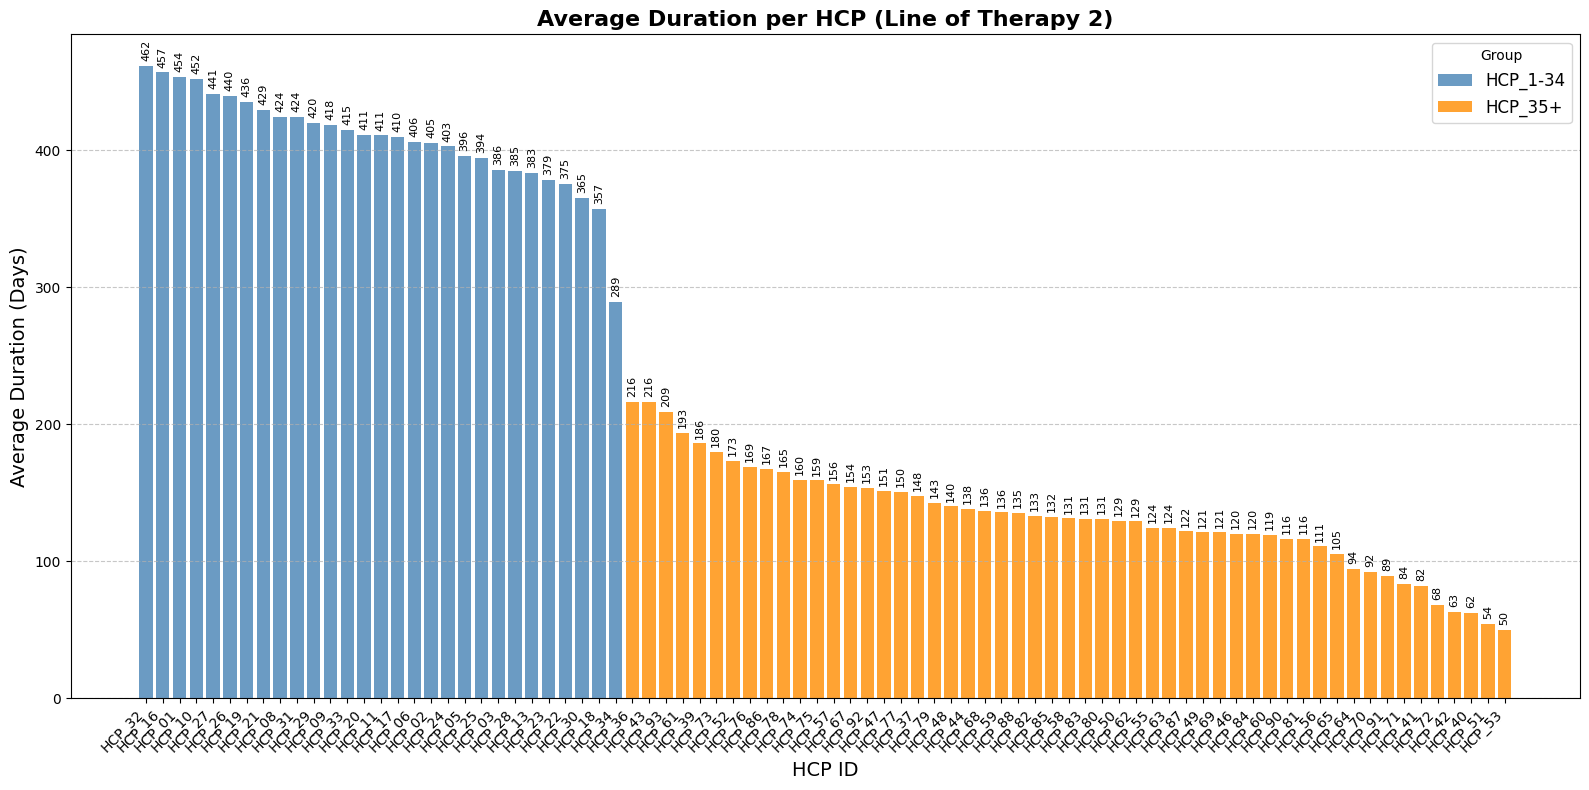

In [891]:
# Sort data by Group and Duration for better readability
hcp_data_filtered = hcp_data_filtered.sort_values(by=['Group', 'Duration'], ascending=[True, False])

# Plotting with enhanced readability
plt.figure(figsize=(16, 8))
colors = {'HCP_1-34': 'steelblue', 'HCP_35+': 'darkorange'}

for group in hcp_data_filtered['Group'].unique():
    subset = hcp_data_filtered[hcp_data_filtered['Group'] == group]
    plt.bar(subset['HCP_ID'], subset['Duration'], label=group, color=colors[group], alpha=0.8)

# Adding annotations for clarity
for idx, row in hcp_data_filtered.iterrows():
    plt.text(row['HCP_ID'], row['Duration'] + 5, f"{row['Duration']:.0f}", ha='center', fontsize=8, rotation=90)

# Enhanced chart labels and styles
plt.title('Average Duration per HCP (Line of Therapy 2)', fontsize=16, weight='bold')
plt.xlabel('HCP ID', fontsize=14)
plt.ylabel('Average Duration (Days)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Group', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [892]:
data_imputation_df[data_imputation_df['HCP_ID']=='HCP_91']

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,...,Product Category,Product Abbreviation,flag,YM,Gap,Lot number,start_date,end_date,Regimen,Year
2236,PATIENT_159,HCP_91,276,70552,2022-05-11,I10,C78.8,S322XXB,NaN,NaN,...,NaN,NaN,2,202205,34.000000,1,2022-04-07,2022-10-14,NOV,2022
2237,PATIENT_159,HCP_91,280,70552,2022-07-10,C34.2,NaN,NaN,NaN,NaN,...,NaN,NaN,2,202207,60.000000,1,2022-04-07,2022-10-14,NOV,2022
2238,PATIENT_159,HCP_91,281,J1002,2022-08-06,C34.12,I10,NaN,NaN,NOVmatinib,...,Market Basket,NOV,2,202208,27.000000,1,2022-04-07,2022-10-14,NOV,2022
2239,PATIENT_159,HCP_91,282,70460,2022-08-18,C34.12,C78,S61111A,NaN,NaN,...,NaN,NaN,3,202208,12.000000,1,2022-04-07,2022-10-14,NOV,2022
2240,PATIENT_159,HCP_91,278,70460,2022-09-09,C34.11,NaN,38524,NaN,NaN,...,NaN,NaN,3,202209,22.000000,1,2022-04-07,2022-10-14,NOV,2022
2241,PATIENT_159,HCP_91,270,70460,2022-10-14,C34.1,75489,NaN,NaN,NaN,...,NaN,NaN,3,202210,35.000000,1,2022-04-07,2022-10-14,NOV,2022
2856,PATIENT_332,HCP_91,1687,J2002,2022-06-11,C34.11,C78.3,NaN,NaN,Paclitaxel,...,Chemotherapy,NaN,2,202206,13.925971,1,2022-06-11,2022-06-11,NaN,2022
2857,PATIENT_332,HCP_91,1686,J2002,2022-09-08,C34.1,C78.7,M25659,NaN,Paclitaxel,...,Chemotherapy,NaN,2,202209,89.000000,2,2022-09-08,2022-09-08,NaN,2022


# Opportunity Model

## **Step 1: Define the Opportunity Score**
We aim to calculate a score that helps identify:
- **Patients likely to stay on the same product (Retention Score)**
- **Patients likely to switch (Switching Score)**

A **higher opportunity score** means a **higher likelihood of switching**, so that interventions (e.g., patient outreach, alternative drug suggestions) can be made in advance.

---

## **Step 2: Key Predictors of Switching**
Using the available features, here’s how we can derive **retention vs. switching likelihood**:

### **1️⃣ Retention Indicators (Higher values = More likely to stay)**
- **Continuous Therapy Duration** (`start_date` to `end_date` for the same product)
- **No Large Gaps Between Claims** (`Gap` feature, lower values suggest continuity)
- **Regimen Stability** (`Regimen` consistency over time)
- **Same HCPCS Code Usage** (Indicates repeated usage of the same procedure or treatment)
- **Patients on L1 or L2 (Base Treatment Level Stability)**

### **2️⃣ Switching Indicators (Higher values = More likely to switch)**
- **Large Gaps Between Claims** (High `Gap` values indicate discontinuity)
- **Multiple Regimens Over Time** (Frequent `Regimen` changes)
- **Frequent Product Name Changes** (`Product Name` change indicates switching)
- **Use of Combination Therapy** (Patients on `L1+Product`, `L2+Product`, `L1+Chemo`, `L2+Chemo` may be transitioning)
- **EGFR Inhibitor Additions** (`L1+EGFR+Product`, `Product+L2+EGFR` may indicate a treatment shift)

---

## **Step 3: Formula for Opportunity Score**
We define:

\[
PSOS = w_1 (\text{Gap}) + w_2 (\text{Regimen Change}) + w_3 (\text{Product Change}) + w_4 (\text{L1/L2 Transition}) + w_5 (\text{Combination Therapy Indicator})
\]

Where:
- **Higher PSOS** → More likely to switch.
- **Lower PSOS** → More likely to stay.

**Example Weights** (Tuned via historical data):
- \( w_1 \) = 0.3 (Gap impact)
- \( w_2 \) = 0.25 (Regimen change impact)
- \( w_3 \) = 0.2 (Product change impact)
- \( w_4 \) = 0.1 (L1/L2 transition)
- \( w_5 \) = 0.05 (Combination therapy involvement)

---

I've computed the **Patient Switching Opportunity Score (PSOS)** for each claim, ranking patients by their likelihood of switching. The **higher the PSOS**, the greater the likelihood of transitioning to a different product or regimen. Let me know if you'd like to adjust weights, incorporate additional features, or apply this to your full dataset! 🚀

In [893]:
# Convert date columns to datetime format
df["Transaction date"] = pd.to_datetime(df["Transaction date"], format="%m-%d-%Y")
df["start_date"] = pd.to_datetime(df["start_date"], format="%m-%d-%Y")
df["end_date"] = pd.to_datetime(df["end_date"], format="%m-%d-%Y")

# Calculate regimen change indicator (1 if regimen changes, 0 otherwise)
df["Regimen Change"] = df["Regimen"].ne(df["Regimen"].shift()).astype(int)

# Calculate product change indicator (assuming "Product Name" exists)
df["Product Change"] = df["Product Name"].ne(df["Product Name"].shift()).astype(int)

In [894]:
# Define the target product for switching analysis
target_product = "Ticaprant"

# Adding a column to identify if the patient was on Ticaprant (assuming it appears in "Product Name" or "Regimen")
df["On Ticaprant"] = df["Regimen"].apply(lambda x: 1 if isinstance(x, str) and "TIC" in x else 0)

# Calculate switching indicator:
# A patient is considered a "Switcher" if they move from being on Ticaprant to another product or vice versa
df["Switched from Ticaprant"] = df["On Ticaprant"].shift(1).eq(1) & df["On Ticaprant"].eq(0)
df["Switched to Ticaprant"] = df["On Ticaprant"].shift(1).eq(0) & df["On Ticaprant"].eq(1)

# Overall Switching Indicator (either direction)
df["Switched"] = df["Switched from Ticaprant"] | df["Switched to Ticaprant"]

# Assign weights to features specific to Ticaprant switching
w_gap = 0.3
w_regimen = 0.25
w_product = 0.2
w_tic_switch = 0.4  # Higher weight for actual Ticaprant switch

# Compute **Ticaprant-Specific Patient Switching Opportunity Score (TIC_PSOS)**
df["TIC_PSOS"] = (
    (df["Gap"] * w_gap) +
    (df["Regimen Change"] * w_regimen) +
    (df["Product Change"] * w_product) +
    (df["Switched"].astype(int) * w_tic_switch)
)

# Sort patients by highest Ticaprant-specific opportunity score
df_sorted = df.sort_values(by="TIC_PSOS", ascending=False)

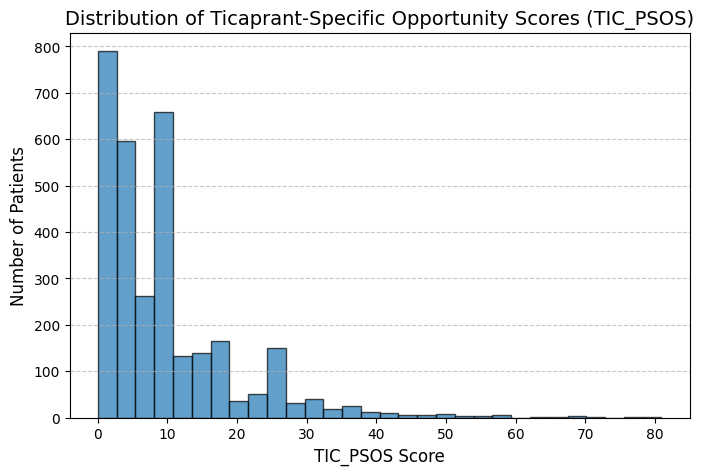

In [895]:
import matplotlib.pyplot as plt

# Plot the distribution of TIC_PSOS scores
plt.figure(figsize=(8, 5))
plt.hist(df_sorted["TIC_PSOS"].dropna(), bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title("Distribution of Ticaprant-Specific Opportunity Scores (TIC_PSOS)", fontsize=14)
plt.xlabel("TIC_PSOS Score", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [896]:
# Check if HCP_ID exists in the dataframe
if "HCP_ID" in df.columns:
    # 1. Compute the average TIC_PSOS per HCP
    hcp_psos = df.groupby("HCP_ID")["TIC_PSOS"].mean().reset_index()
    hcp_psos = hcp_psos.sort_values(by="TIC_PSOS", ascending=False)

    # 2. Merge the HCP-level TIC_PSOS back to the patient data
    df_mapped = df.merge(hcp_psos, on="HCP_ID", suffixes=("", "_HCP_Avg"))

    # 3. Sort patients by their own TIC_PSOS
    df_mapped_sorted = df_mapped.sort_values(by="TIC_PSOS", ascending=False)

    # Display top HCPs by average TIC_PSOS
    print("\n=== Top HCPs by Average TIC_PSOS ===")
    print(hcp_psos.head(10))

    # Display top patients with their HCP mapping
    print("\n=== Patient-Level Scores with Mapped HCPs ===")
    print(df_mapped_sorted[["Pat_ID", "HCP_ID", "TIC_PSOS", "TIC_PSOS_HCP_Avg"]].head(10))

else:
    print("Column 'HCP_ID' not found in the dataset. Ensure 'HCP_ID' is available.")



=== Top HCPs by Average TIC_PSOS ===
    HCP_ID   TIC_PSOS
79  HCP_88  17.700000
80  HCP_90  17.544737
33  HCP_40  17.050000
60  HCP_69  16.825000
35  HCP_42  16.768182
58  HCP_67  16.540000
55  HCP_63  16.403846
41  HCP_48  15.880000
52  HCP_60  15.734615
42  HCP_49  15.675000

=== Patient-Level Scores with Mapped HCPs ===
           Pat_ID  HCP_ID  TIC_PSOS  TIC_PSOS_HCP_Avg
2468  PATIENT_233  HCP_60     80.95         15.734615
2607  PATIENT_273  HCP_90     76.95         17.544737
2953  PATIENT_366  HCP_40     71.55         17.050000
2985  PATIENT_373  HCP_52     69.60         12.779032
2663  PATIENT_290  HCP_87     67.65         13.652778
2915  PATIENT_357  HCP_67     67.50         16.540000
3077  PATIENT_399  HCP_59     67.05         13.650000
2351  PATIENT_190  HCP_60     62.85         15.734615
3039  PATIENT_391  HCP_92     59.35         14.052381
2446  PATIENT_224  HCP_84     58.35         15.307143


In [897]:
df_sorted[df_sorted['TIC_PSOS']== 0.00]['Pat_ID'].nunique()

16

In [898]:
data_imputation_df

,Pat_ID,HCP_ID,Claim ID,HCPCS_ code,Transaction date,Diagnosis 1,Diagnosis 2,Diagnosis 3,Diagnosis 4,Product Name,...,Product Category,Product Abbreviation,flag,YM,Gap,Lot number,start_date,end_date,Regimen,Year
1,PATIENT_001,HCP_17,268985,G9418,2021-06-16,I10,NaN,NaN,NaN,NaN,...,NaN,NaN,2,202106,56.0,1,2021-04-21,2021-06-16,NaN,2021
2,PATIENT_001,HCP_17,277492,J9999,2021-09-08,I10,NaN,NaN,NaN,NaN,...,NaN,NaN,4,202109,84.0,2,2021-09-08,2022-11-22,RIZ_TIC,2021
3,PATIENT_001,HCP_17,286233,J9999,2021-10-06,I10,NaN,NaN,NaN,NaN,...,NaN,NaN,4,202110,28.0,2,2021-09-08,2022-11-22,RIZ_TIC,2021
4,PATIENT_001,HCP_17,302457,J9999,2021-11-03,I10,NaN,NaN,NaN,NaN,...,NaN,NaN,4,202111,28.0,2,2021-09-08,2022-11-22,RIZ_TIC,2021
5,PATIENT_001,HCP_17,321598,G9418,2021-12-01,I10,NaN,NaN,NaN,NaN,...,NaN,NaN,2,202112,28.0,2,2021-09-08,2022-11-22,RIZ_TIC,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,PATIENT_422,HCP_78,2453,78815,2022-05-18,C34.3,75489,E914,NaN,NaN,...,NaN,NaN,2,202205,37.0,1,2022-04-11,2022-06-19,NaN,2022
3216,PATIENT_422,HCP_78,2444,78815,2022-06-19,C34.11,NaN,NaN,NaN,NaN,...,NaN,NaN,2,202206,32.0,1,2022-04-11,2022-06-19,NaN,2022
3217,PATIENT_422,HCP_78,2450,J9999,2022-12-04,C34.8,C78.5,NaN,NaN,NaN,...,NaN,NaN,2,202212,168.0,2,2022-12-04,2022-12-04,NaN,2022
3219,PATIENT_423,HCP_39,2462,70551,2022-04-24,I10,NaN,1794,NaN,NaN,...,NaN,NaN,3,202204,95.0,2,2022-04-24,2022-10-22,NaN,2022


In [899]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# ==============================
# 1. PREPARE DATA
# ==============================
features = ["Gap", "Regimen Change", "Product Change", "On Ticaprant"]
target = "Switched"

# Drop missing values
ml_data = df_sorted.dropna(subset=features + [target])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    ml_data[features],
    ml_data[target],
    test_size=0.2,
    random_state=42,
    stratify=ml_data[target]  # helps preserve class distribution
)


# 2. HANDLE CLASS IMBALANCE (SMOTE)
sm = SMOTE(sampling_strategy=0.4, random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# 3. DEFINE XGBOOST + PARAM GRID
xgb_model = XGBClassifier(
    scale_pos_weight=1,   # classes are partially balanced after SMOTE
    random_state=42,
    use_label_encoder=False,  # remove warning in newer XGBoost
    eval_metric="logloss"     # remove default warning
)


param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.01, 0.08],
    "min_child_weight": [1, 5],
    "gamma": [0, 2],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.8, 1.0]
}


f2_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)


# 4. HYPERPARAMETER TUNING
grid_search.fit(X_train_sm, y_train_sm)

# Retrieve best model
best_xgb = grid_search.best_estimator_
print(f"Best Params: {grid_search.best_params_}")

# 5. PREDICT + THRESHOLD TUNING
y_probs = best_xgb.predict_proba(X_test)[:, 1]

# Search thresholds to find best F2
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
best_f2 = 0
best_thresh = 0.5

for thresh in thresholds:
    y_pred_temp = (y_probs >= thresh).astype(int)
    f2_val = fbeta_score(y_test, y_pred_temp, beta=2)
    if f2_val > best_f2:
        best_f2 = f2_val
        best_thresh = thresh

print(f"Best threshold by F2-score: {best_thresh:.3f}, F2-score: {best_f2:.3f}")

final_threshold =0.70
y_pred = (y_probs >= final_threshold).astype(int)

# 6. EVALUATE MODEL
accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

print(f"\nFinal Threshold: {final_threshold:.3f}")
print(f"Model Accuracy: {accuracy:.3f}")
print(f"F2-score: {f2:.3f}")
print("Classification Report:")
print(class_rep)


Fitting 3 folds for each of 128 candidates, totalling 384 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:29:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.9}
Best threshold by F2-score: 0.681, F2-score: 0.695

Final Threshold: 0.700
Model Accuracy: 0.987
F2-score: 0.670
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       612
        True       1.00      0.62      0.76        21

    accuracy                           0.99       633
   macro avg       0.99      0.81      0.88       633
weighted avg       0.99      0.99      0.99       633



In [900]:
# Display sorted patient scores
df_sorted[["Pat_ID", "TIC_PSOS"]].head(10)

,Pat_ID,TIC_PSOS
2488,PATIENT_233,80.95
2633,PATIENT_273,76.95
3003,PATIENT_366,71.55
3035,PATIENT_373,69.60
2691,PATIENT_290,67.65
2961,PATIENT_357,67.50
3129,PATIENT_399,67.05
2361,PATIENT_190,62.85
3091,PATIENT_391,59.35
2462,PATIENT_224,58.35


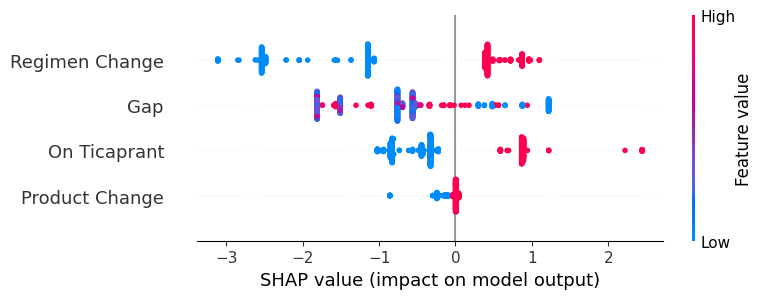

In [901]:
# SHAP Analysis
# SHAP Analysis
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)







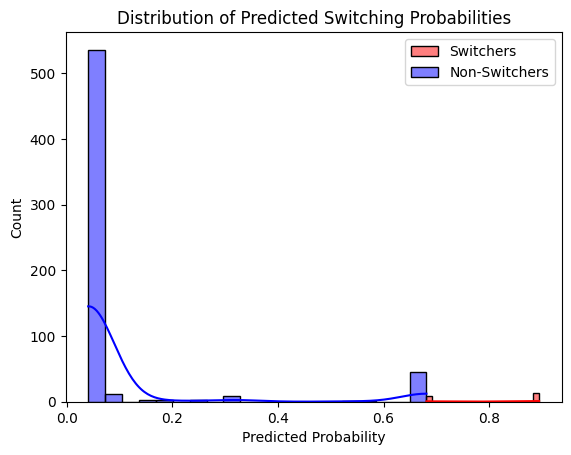

In [902]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities
sns.histplot(y_probs[y_test == 1], bins=20, color="red", label="Switchers", kde=True)
sns.histplot(y_probs[y_test == 0], bins=20, color="blue", label="Non-Switchers", kde=True)
plt.legend()
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Distribution of Predicted Switching Probabilities")
plt.show()


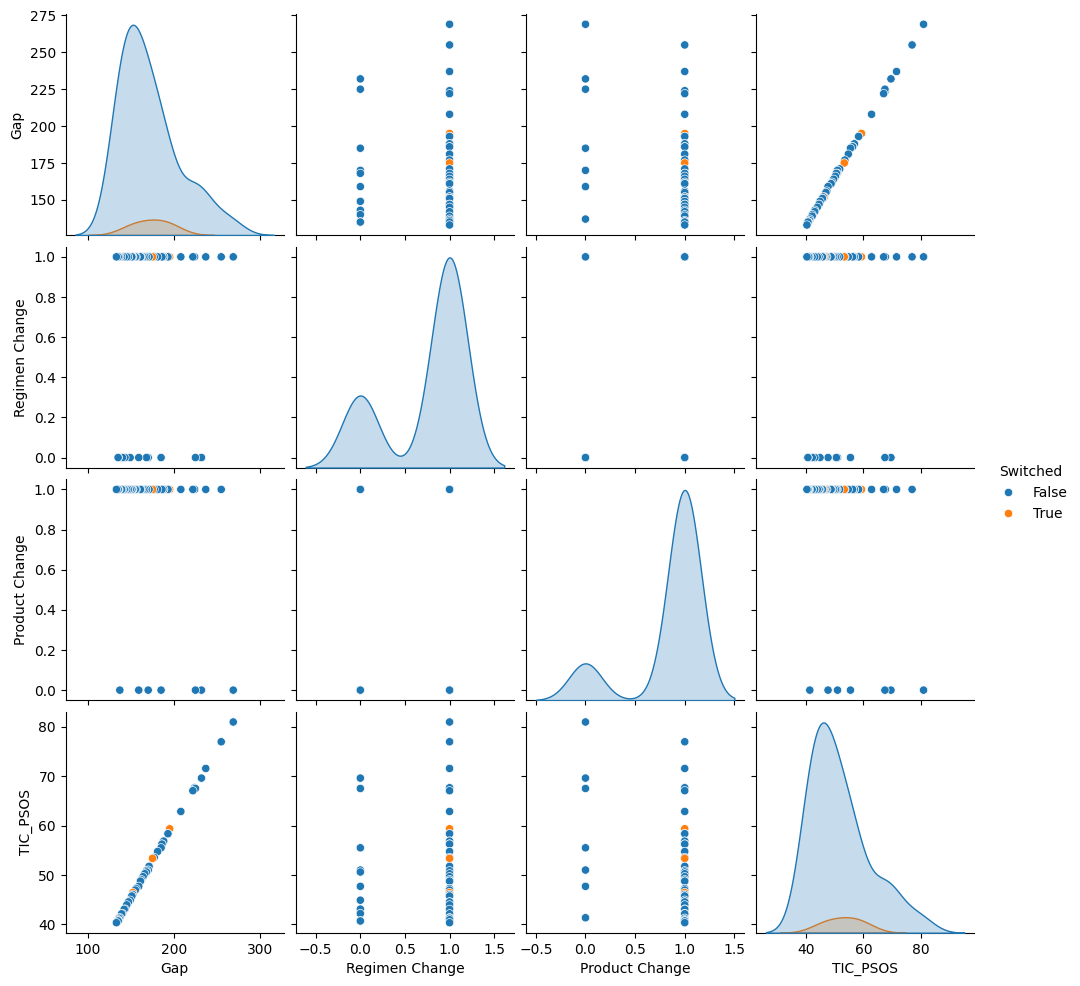

In [903]:
import seaborn as sns

# Sort by highest TIC_PSOS
top_switchers = df_sorted.sort_values("TIC_PSOS", ascending=False).head(50)

# Pairplot to visualize key differences
sns.pairplot(top_switchers, vars=["Gap", "Regimen Change", "Product Change", "TIC_PSOS"], hue="Switched")
plt.show()
